# Predicting Student Academic Success or Dropout

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

In [2]:
df = pd.read_csv('Data/Dropout_Academic_Success.csv', delimiter=',')
display(df)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


## Exploratory data analysis

In [8]:
df.describe().round(2)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,...,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00
mean,1.18,18.67,1.73,8856.64,0.89,4.58,132.61,1.87,19.56,22.28,...,0.14,0.54,6.23,8.06,4.44,10.23,0.15,11.57,1.23,0.00
std,0.61,17.48,1.31,2063.57,0.31,10.22,13.19,6.91,15.60,15.34,...,0.69,1.92,2.20,3.95,3.01,5.21,0.75,2.66,1.38,2.27
min,1.00,1.00,0.00,33.00,0.00,1.00,95.00,1.00,1.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.60,-0.80,-4.06
25%,1.00,1.00,1.00,9085.00,1.00,1.00,125.00,1.00,2.00,3.00,...,0.00,0.00,5.00,6.00,2.00,10.75,0.00,9.40,0.30,-1.70
50%,1.00,17.00,1.00,9238.00,1.00,1.00,133.10,1.00,19.00,19.00,...,0.00,0.00,6.00,8.00,5.00,12.20,0.00,11.10,1.40,0.32
75%,1.00,39.00,2.00,9556.00,1.00,1.00,140.00,1.00,37.00,37.00,...,0.00,0.00,7.00,10.00,6.00,13.33,0.00,13.90,2.60,1.79
max,6.00,57.00,9.00,9991.00,1.00,43.00,190.00,109.00,44.00,44.00,...,12.00,19.00,23.00,33.00,20.00,18.57,12.00,16.20,3.70,3.51


In [9]:
#Checking null values:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

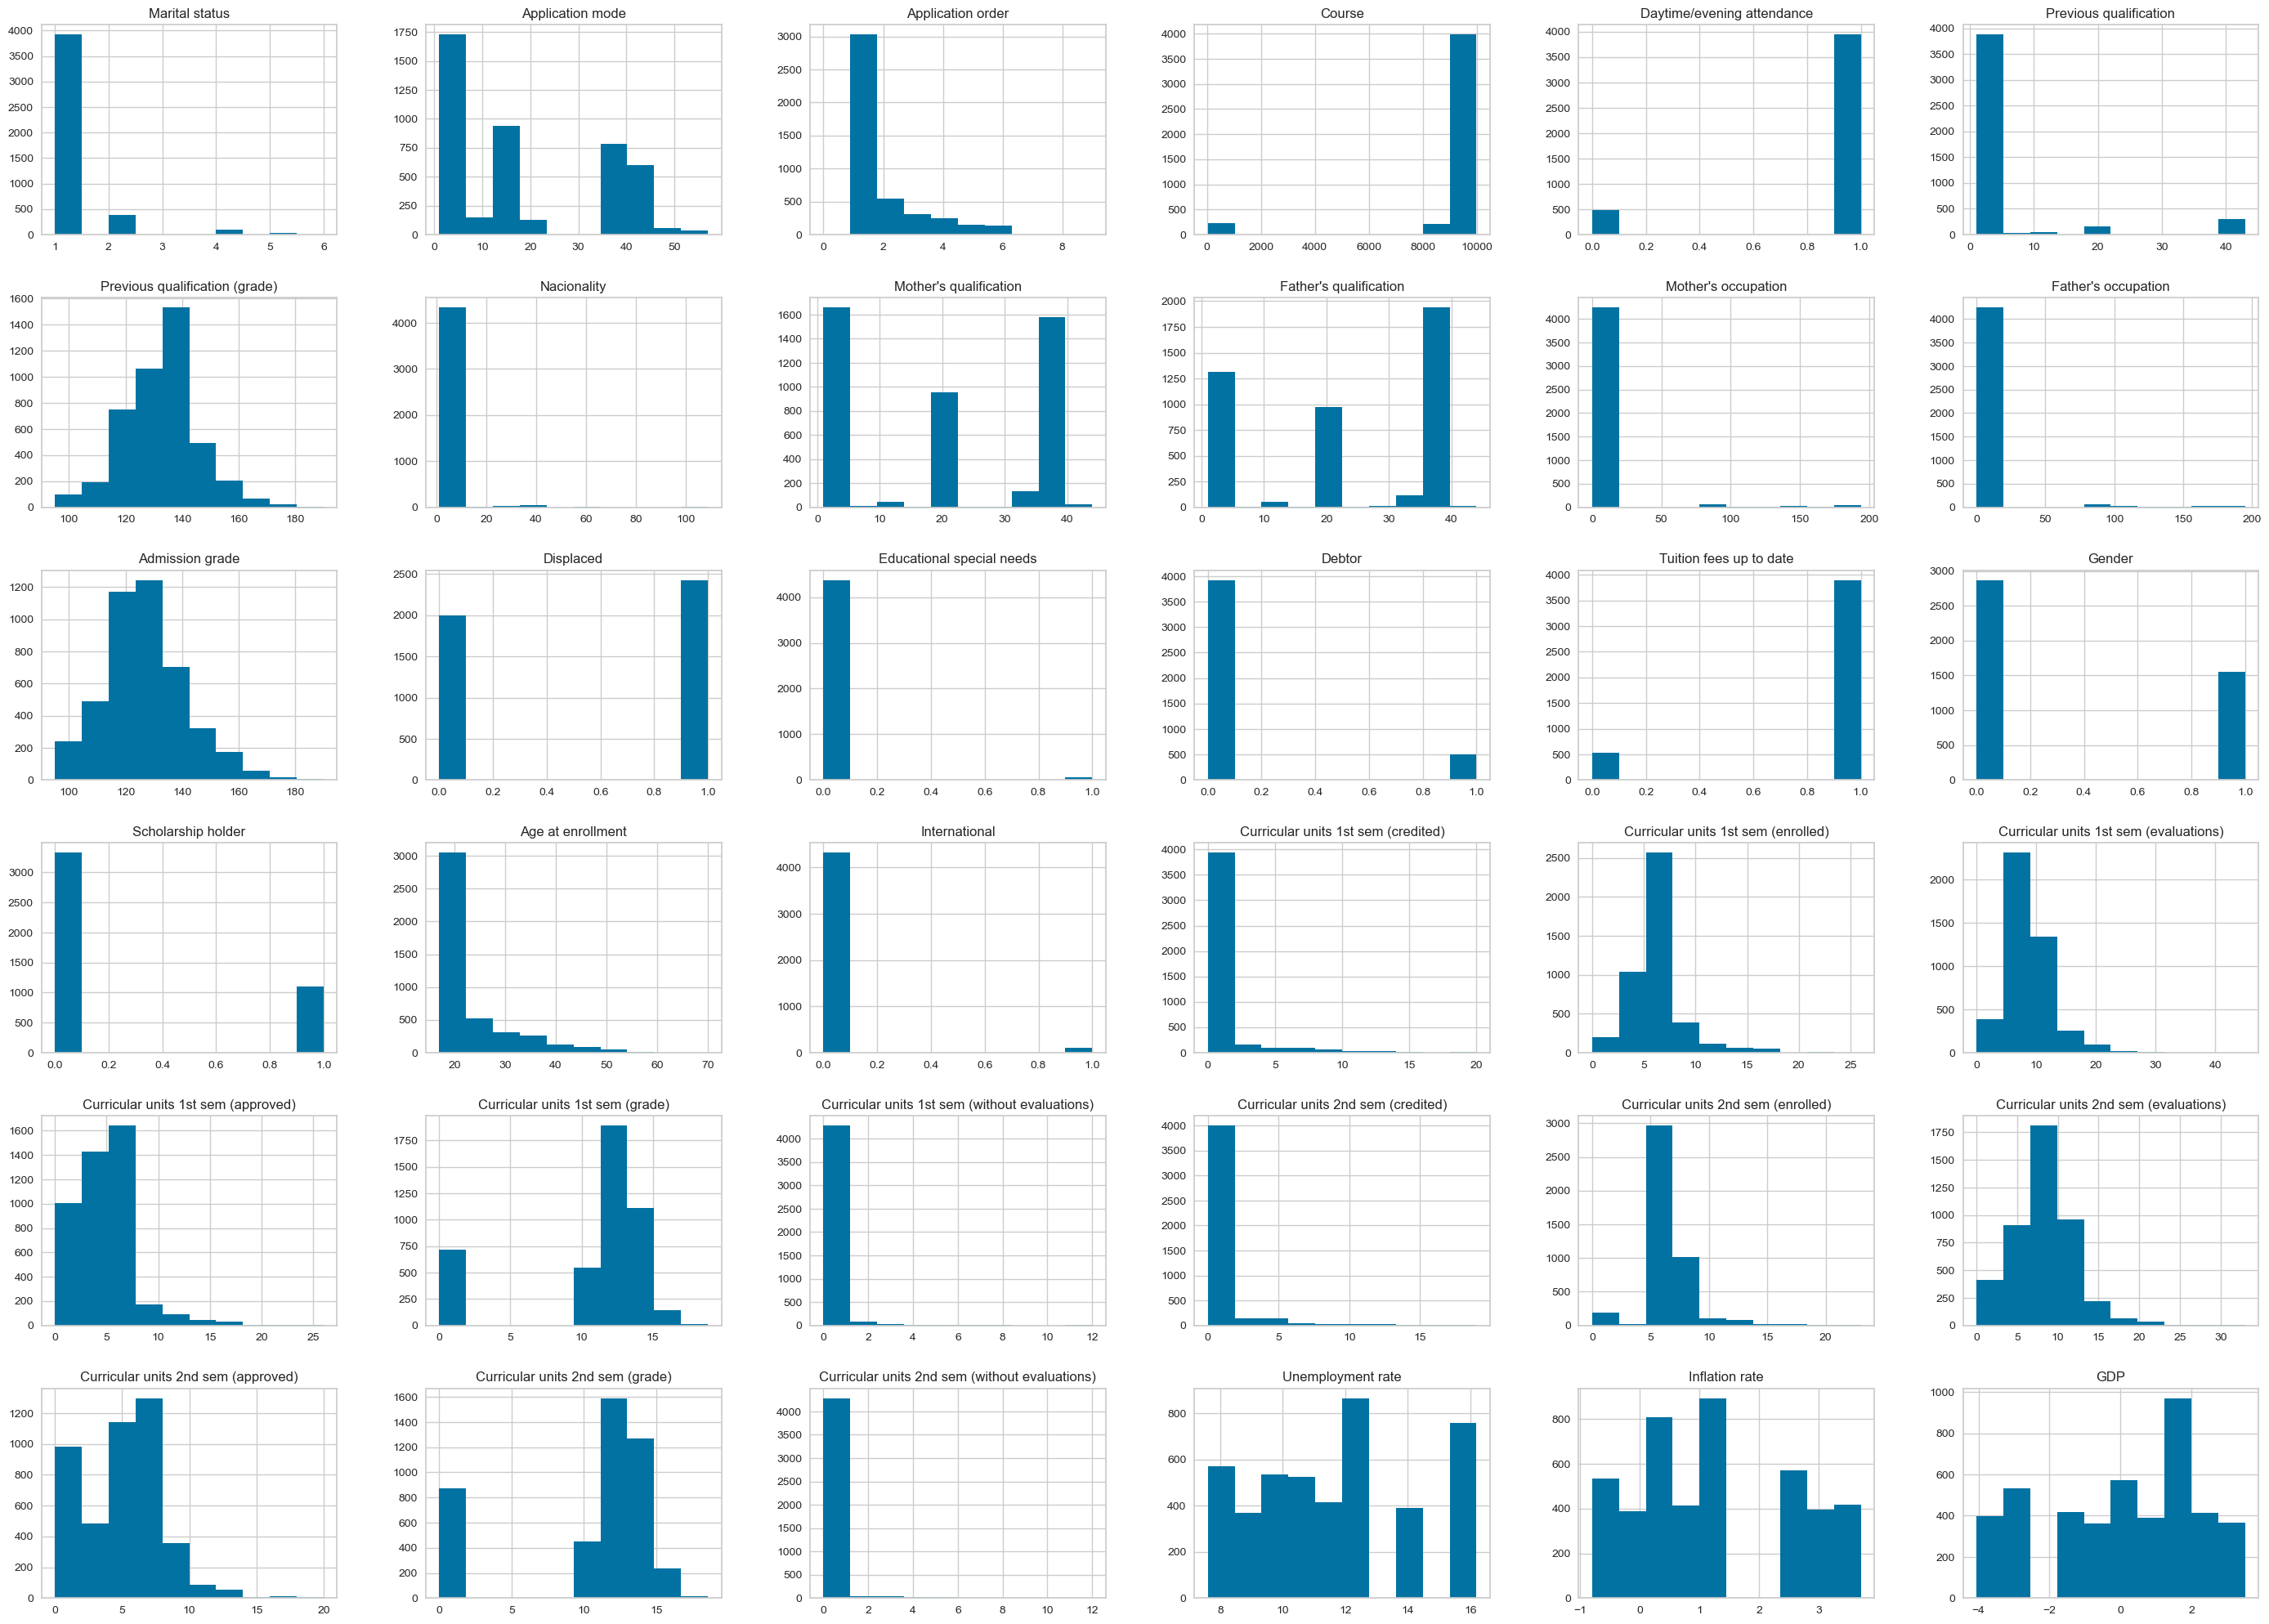

In [11]:
# Plot histograms for all features
df.hist(figsize=(35,25))
plt.show()

#### Distribution of target feature

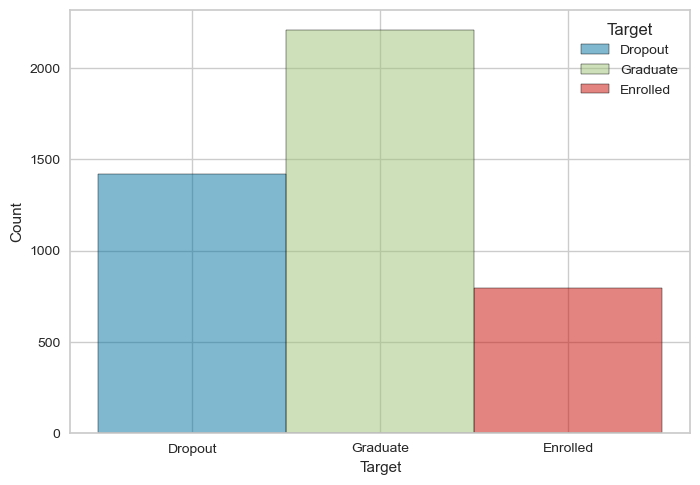

In [12]:
# Plot the distribution of the target feature
sns.histplot(data=df, x='Target', hue='Target', kde=False)
plt.show()

In [13]:
# Calculate the number and percentage of instances for each category in the target feature
counts = df['Target'].value_counts()
percentages = 100 * counts / sum(counts)

print("Number of instances for each category:")
print(counts)
print("\nPercentage of instances for each category:")
print(percentages.round(2))

Number of instances for each category:
Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

Percentage of instances for each category:
Graduate    49.93
Dropout     32.12
Enrolled    17.95
Name: Target, dtype: float64


### Feature analysis & engineering

In [3]:
import matplotlib.pyplot as plt

def plot_distribution_of_target_by_feature(feature):
    df.groupby(feature)['Target'].value_counts().unstack().plot(kind='bar', stacked=True)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Distribution of Target Variable by {feature}')
    plt.show()

In [4]:
# function that converts numeric labels to their corresponding values
def label_map(labels_map, label):
    value_map = labels_map
    return value_map.get(label, label)

def plot_percentual_distribution_of_target_by_feature(feature, labels):  
    grouped_data = df.groupby([feature, "Target"]).size().unstack()

    # Convert the counts to percentages
    percentages = grouped_data.div(grouped_data.sum(axis=1), axis=0)

    # Plot the stacked bar chart
    ax = percentages.plot(kind="bar", stacked="percent")

    # Add the percentages to the bars
    for container in ax.containers:
        for i, bar in enumerate(container):
            percentage = f"{bar.get_height():.1%}"
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, percentage, ha="center", va="center", color="white", fontsize=10)

    plt.xlabel(feature)
    plt.ylabel("Percentage")
    plt.title(f"Distribution of Target Variable by {feature}")

    # Add a legend with the target variable labels
    plt.legend(title="Target", loc="center left", bbox_to_anchor=(1.0, 0.5))

    if (feature != "Course"):
        # Add the numeric labels to the corner of the plot
        plt.text(1.1, 0.0, "\n".join([f"{label}: {label_map(labels, label)}" for label in percentages.index.tolist()]), transform=plt.gca().transAxes, fontsize=10, verticalalignment="bottom")

    # Show the plot
    plt.show()

### Socio-economic data

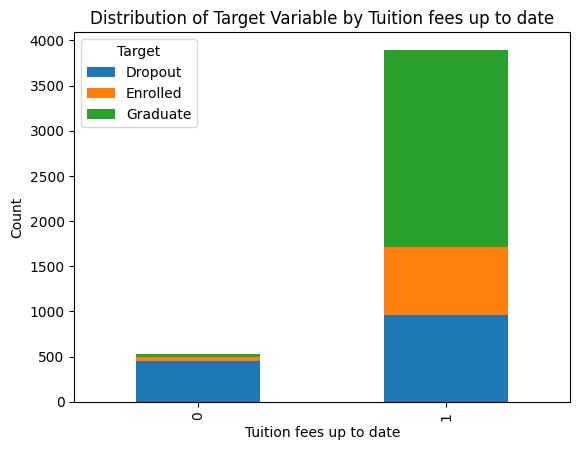

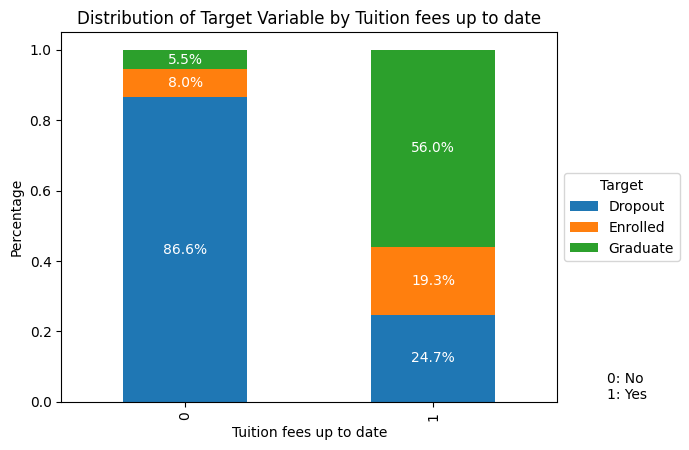

In [5]:
plot_distribution_of_target_by_feature('Tuition fees up to date')

labels_map = {0: "No", 1: "Yes"}
plot_percentual_distribution_of_target_by_feature('Tuition fees up to date', labels_map)

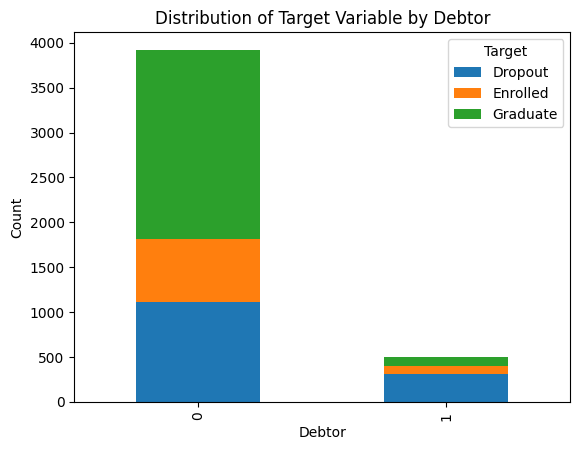

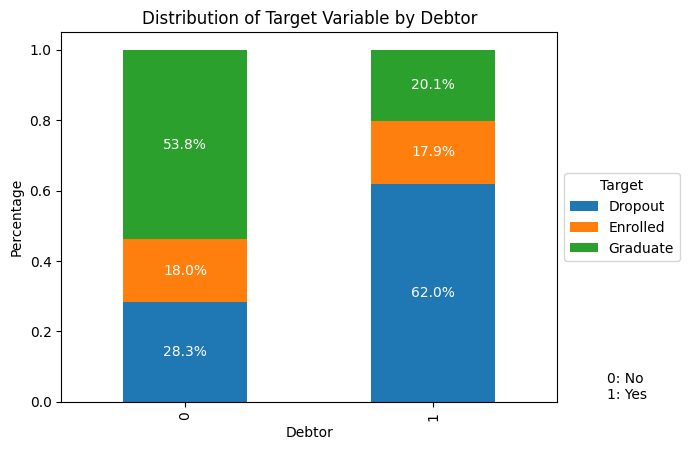

In [6]:
plot_distribution_of_target_by_feature('Debtor')

labels_map = {0: "No", 1: "Yes"}
plot_percentual_distribution_of_target_by_feature('Debtor', labels_map)

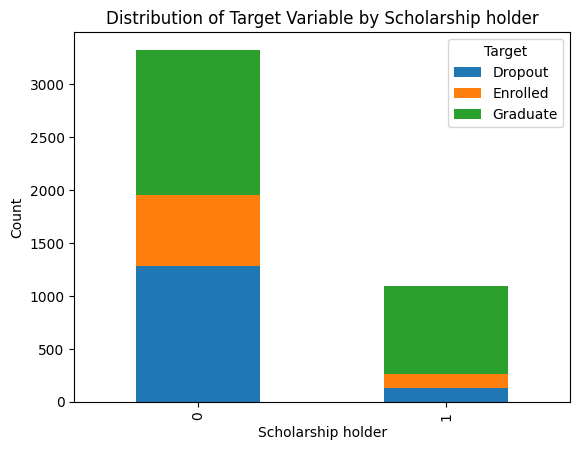

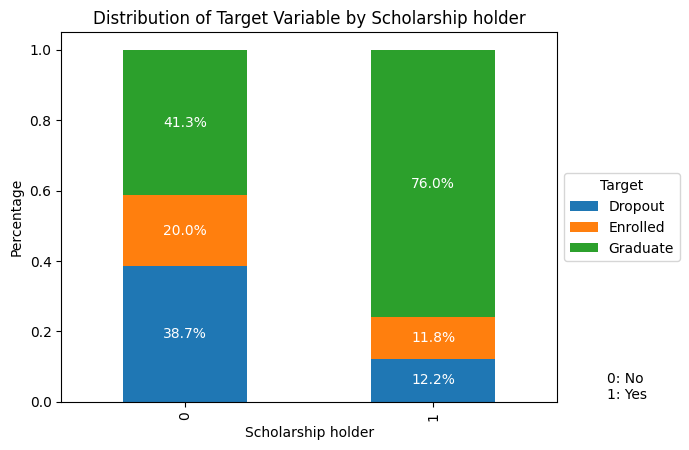

In [7]:
plot_distribution_of_target_by_feature('Scholarship holder')

labels_map = {0: "No", 1: "Yes"}
plot_percentual_distribution_of_target_by_feature('Scholarship holder', labels_map)

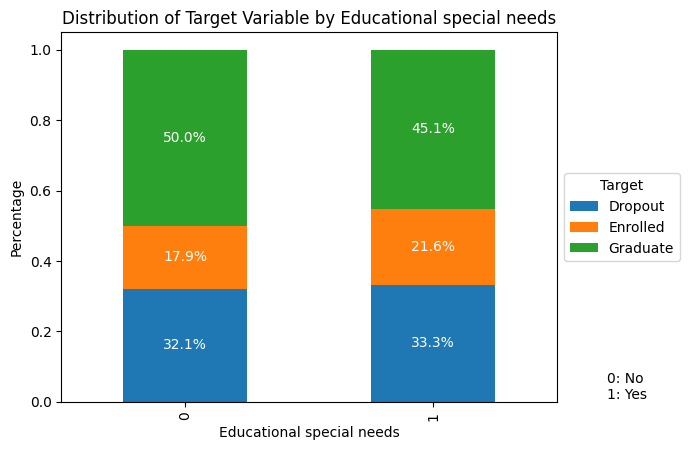

In [8]:
#plot_distribution_of_target_by_feature('Educational special needs')

labels_map = {0: "No", 1: "Yes"}
plot_percentual_distribution_of_target_by_feature('Educational special needs', labels_map)

#### Transforming features Father's qualification and Mother's qualification

Father's and Mother's qualification values with Description  and assigned new value

    0: 'None',
    1: 'Primary',
    2: 'Secondary',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctorate'

    1-  Secondary Education - 12th Year of Schooling or Eq.: 2
    2-  Higher Education - Bachelor's Degree: 3
    3-  Higher Education - Degree: 3
    4-  Higher Education - Master's: 4
    5-  Higher Education - Doctorate: 5
    6-  Frequency of Higher Education: 3
    9-  12th Year of Schooling - Not Completed: 1
    10- 11th Year of Schooling - Not Completed: 1
    11- 7th Year (Old): 0
    12- Other - 11th Year of Schooling: 2
    13 - 2nd year complementary high school course: 1
    14- 10th Year of Schooling: 2
    18- General commerce course: 1
    19- Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.: 2
    20 - Complementary High School Course: 2
    22- Technical-professional course: 1
    25 - Complementary High School Course - not concluded: 1
    26- 7th year of schooling: 1
    27- 2nd cycle of the general high school course: 1
    29- 9th Year of Schooling - Not Completed: 1
    30- 8th year of schooling: 1
    31 - General Course of Administration and Commerce: 1
    33 - Supplementary Accounting and Administration: 2
    34- Unknown: 0
    35- Can't read or write: 0
    36- Can read without having a 4th year of schooling: 0
    37- Basic education 1st cycle (4th/5th year) or equiv.: 0
    38- Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.: 1
    39- Technological specialization course: 1
    40- Higher education - degree (1st cycle): 3
    41- Specialized higher studies course: 2
    42- Professional higher technical course: 2
    43- Higher Education - Master (2nd cycle): 4
    44- Higher Education - Doctorate (3rd cycle): 5

In [9]:
 # mapping dictionary for Father's qualification
new_mapping = {
    1: 2,
    2: 3,
    3: 3,
    4: 4,
    5: 5,
    6: 3,
    9: 1,
    10: 1,
    11: 0,
    12: 2,
    13: 1,
    14: 2,
    18: 1,
    19: 2,
    20: 2,
    22: 1,
    25: 1,
    26: 1,
    27: 1,
    29: 1,
    30: 1,
    31: 1,
    33: 2,
    34: 0,
    35: 0,
    36: 0,
    37: 0,
    38: 1,
    39: 1,
    40: 3,
    41: 2,
    42: 2,
    43: 4,
    44: 5
}

df["Father's qualification mapped"] = df["Father's qualification"].map(new_mapping)
df["Mother's qualification mapped"] = df["Mother's qualification"].map(new_mapping)

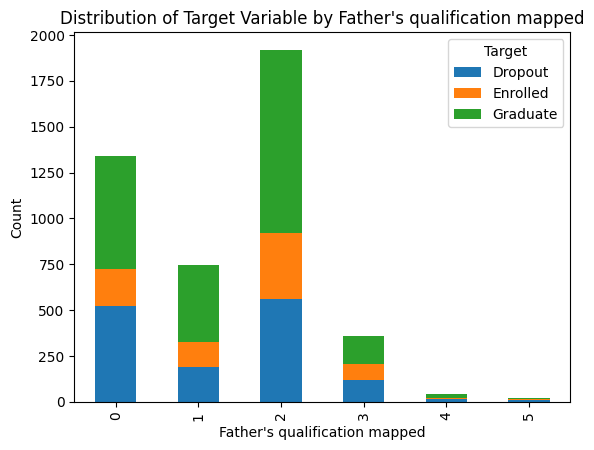

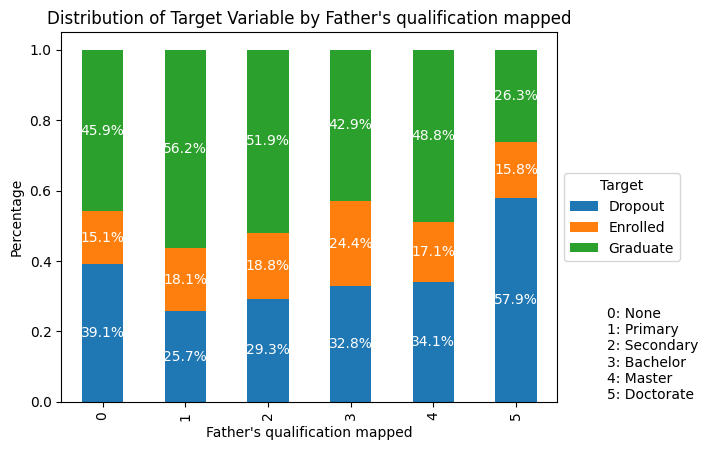

In [10]:
plot_distribution_of_target_by_feature("Father's qualification mapped")

labels_map =   {0: 'None', 1: 'Primary', 2: 'Secondary', 3: 'Bachelor', 4: 'Master', 5: 'Doctorate'}
plot_percentual_distribution_of_target_by_feature("Father's qualification mapped", labels_map)

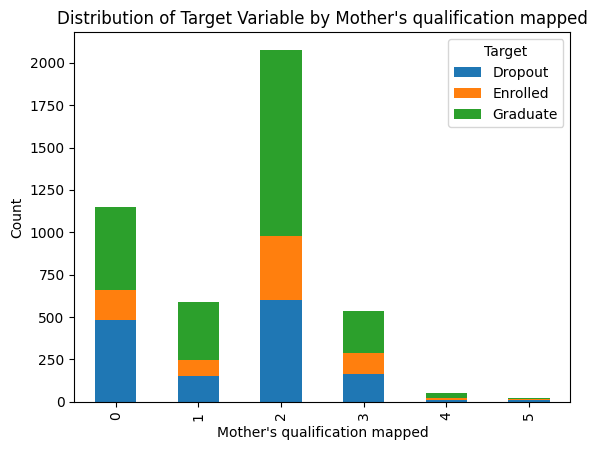

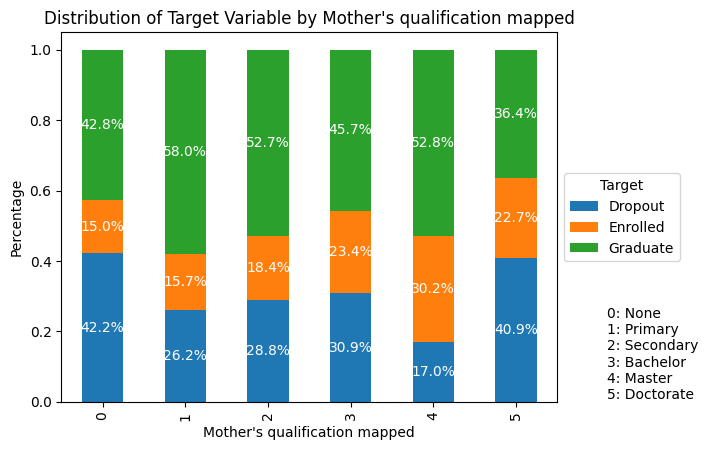

In [11]:
plot_distribution_of_target_by_feature("Mother's qualification mapped")

labels_map =   {0: 'None', 1: 'Primary', 2: 'Secondary', 3: 'Bachelor', 4: 'Master', 5: 'Doctorate'}
plot_percentual_distribution_of_target_by_feature("Mother's qualification mapped", labels_map)

#### Create new feature Parents qualification

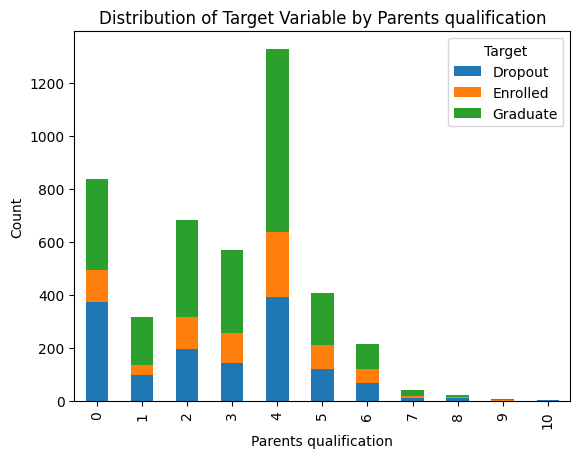

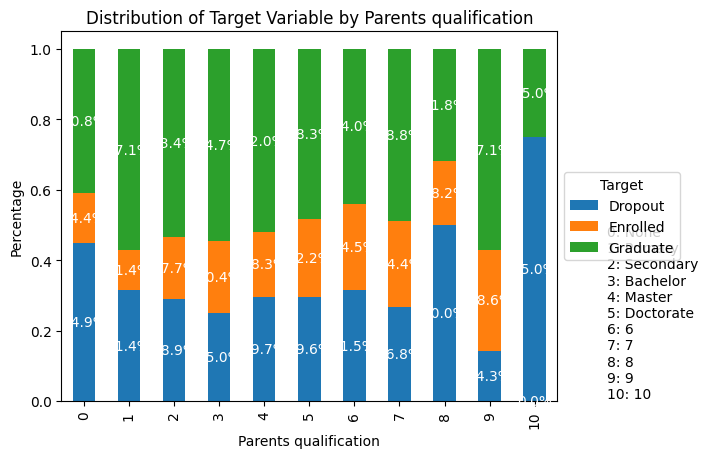

In [12]:
df['Parents qualification'] = df["Father's qualification mapped"] + df["Mother's qualification mapped"]

plot_distribution_of_target_by_feature("Parents qualification")
plot_percentual_distribution_of_target_by_feature("Parents qualification", labels_map)

/var/folders/tn/wjp_97vx7yg_6qh2qztx6z0w0000gn/T/ipykernel_3064/3950912668.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  socio_economic_features['Target_encoded'] = le.fit_transform(socio_economic_features['Target'])
/var/folders/tn/wjp_97vx7yg_6qh2qztx6z0w0000gn/T/ipykernel_3064/3950912668.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = socio_economic_features.corr()


<Axes: >

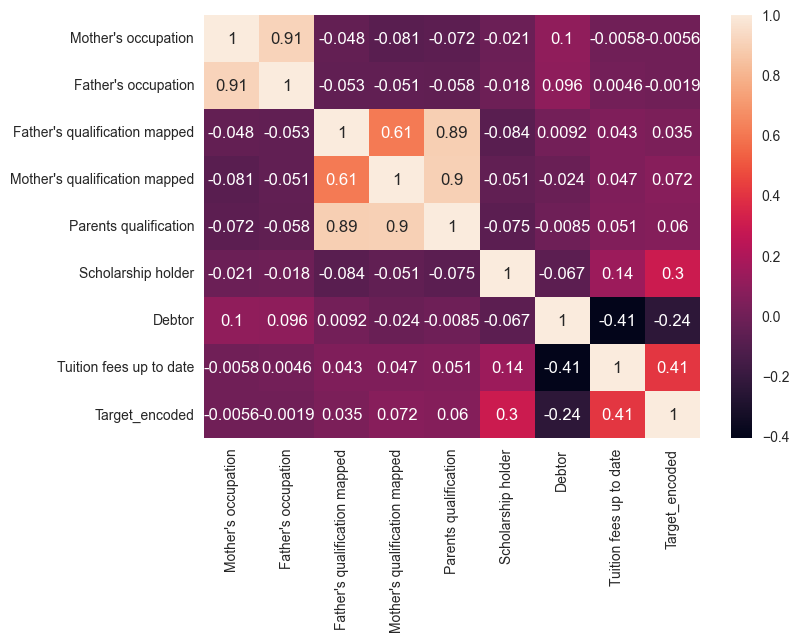

In [55]:
from sklearn.preprocessing import LabelEncoder

# Socio-economic features and target
socio_economic_features = df[["Mother's occupation", "Father's occupation", "Father's qualification mapped", "Mother's qualification mapped", 'Parents qualification', 'Scholarship holder', 'Debtor', 'Tuition fees up to date', 'Target']]

le = LabelEncoder()
socio_economic_features['Target_encoded'] = le.fit_transform(socio_economic_features['Target'])

corr_matrix = socio_economic_features.corr()
sns.heatmap(corr_matrix, annot=True)


### Demographic data

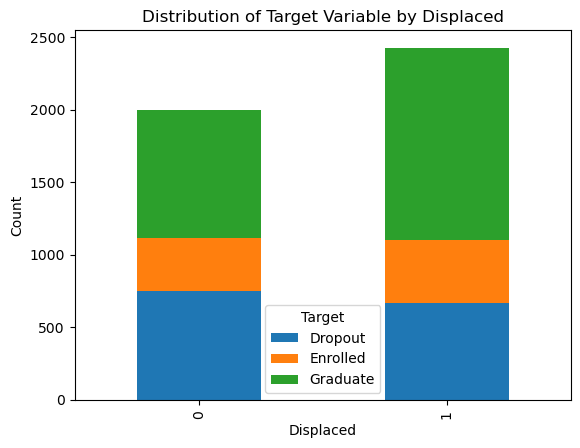

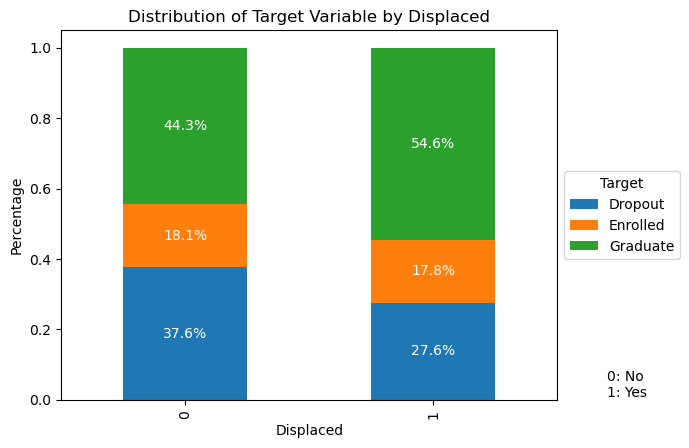

In [145]:
plot_distribution_of_target_by_feature('Displaced')

labels_map = {0: "No", 1: "Yes"}
plot_percentual_distribution_of_target_by_feature('Displaced', labels_map)

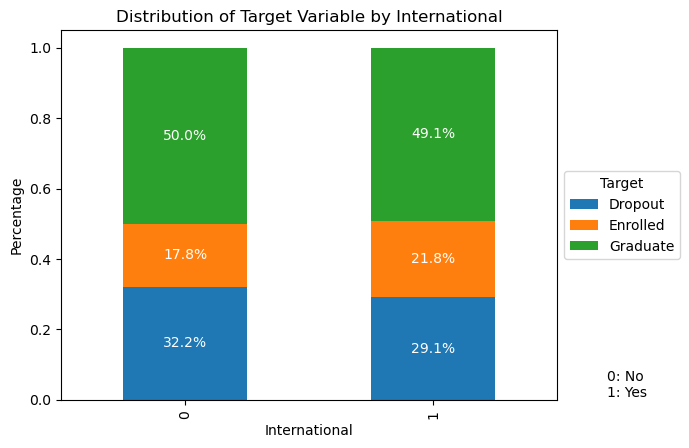

In [183]:
#plot_distribution_of_target_by_feature('International')

labels_map = {0: "No", 1: "Yes"}
plot_percentual_distribution_of_target_by_feature('International', labels_map)

Nationality mapping
    1 - Portuguese
    2 - German
    6 - Spanish
    11 - Italian
    13 - Dutch
    14 - English
    17 - Lithuanian
    21 - Angolan
    22 - Cape Verdean
    24 - Guinean
    25 - Mozambican
    26 - Santomean
    32 - Turkish
    41 - Brazilian
    62 - Romanian
    100 - Moldova (Republic of)
    101 - Mexican
    103 - Ukrainian
    105 - Russian
    108 - Cuban
    109 - Colombian

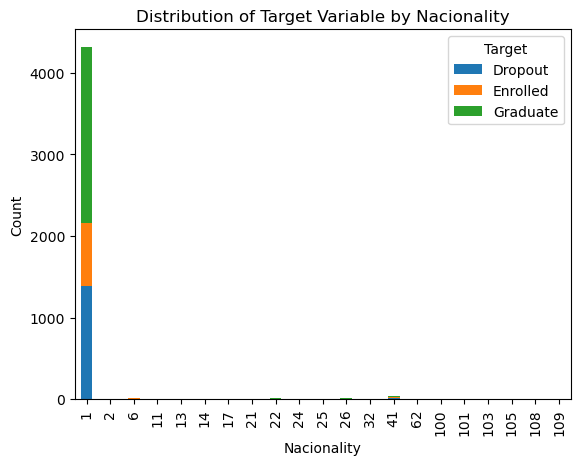

In [200]:
plot_distribution_of_target_by_feature('Nacionality')

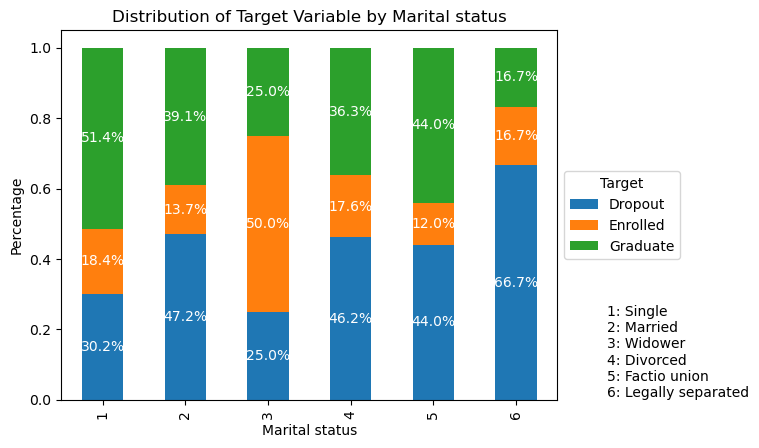

In [184]:
#plot_distribution_of_target_by_feature('Marital status')

labels_map = {1: "Single", 2: "Married", 3: "Widower", 4: "Divorced", 5: "Factio union", 6: "Legally separated"}
plot_percentual_distribution_of_target_by_feature('Marital status', labels_map)

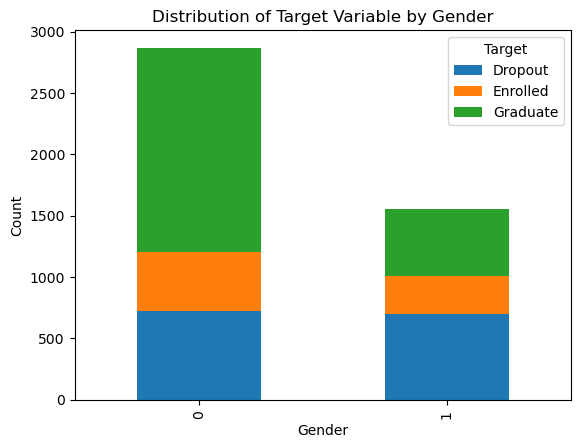

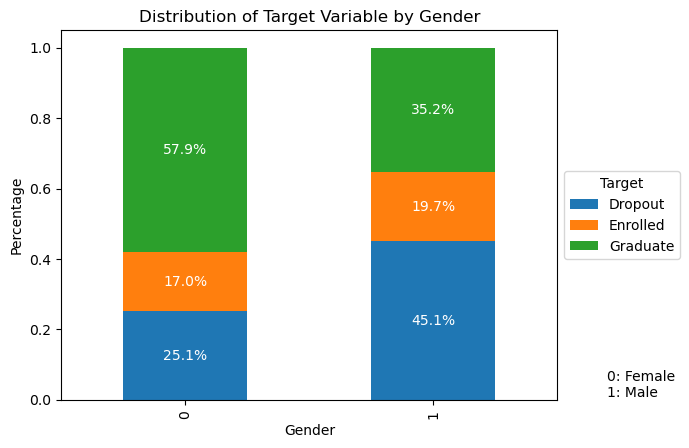

In [185]:
plot_distribution_of_target_by_feature('Gender')

labels_map = {0: "Female", 1: "Male"}
plot_percentual_distribution_of_target_by_feature('Gender', labels_map)

/var/folders/tn/wjp_97vx7yg_6qh2qztx6z0w0000gn/T/ipykernel_3064/252479272.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographic_features['Target_encoded'] = le.fit_transform(demographic_features['Target'])
/var/folders/tn/wjp_97vx7yg_6qh2qztx6z0w0000gn/T/ipykernel_3064/252479272.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = demographic_features.corr()


<Axes: >

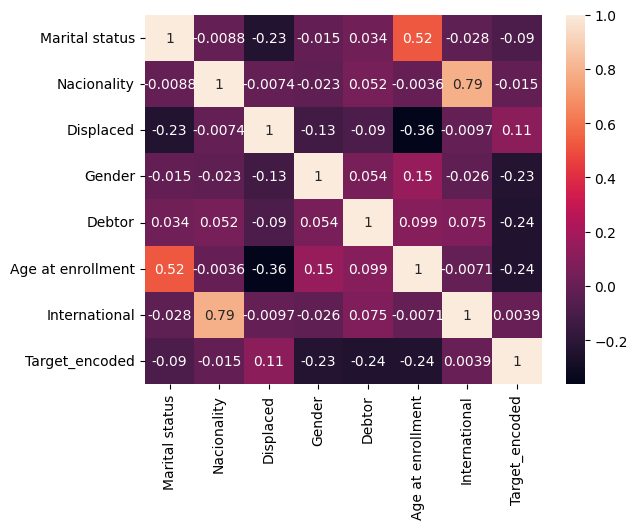

In [22]:
from sklearn.preprocessing import LabelEncoder

# Demographic features and target
demographic_features = df[['Marital status', 'Nacionality', 'Displaced', 'Gender', 'Debtor', 'Age at enrollment', 'International', 'Target']]

le = LabelEncoder()
demographic_features['Target_encoded'] = le.fit_transform(demographic_features['Target'])

corr_matrix = demographic_features.corr()
sns.heatmap(corr_matrix, annot=True)

### Academic data at enrollment

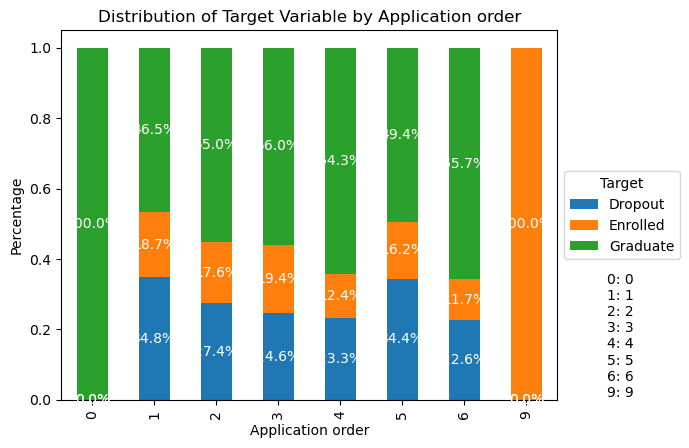

In [198]:
#plot_distribution_of_target_by_feature('Application order')

labels_map = {1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}
plot_percentual_distribution_of_target_by_feature('Application order', labels_map)

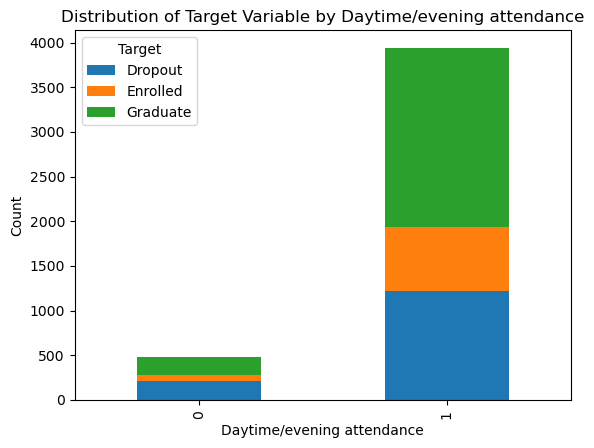

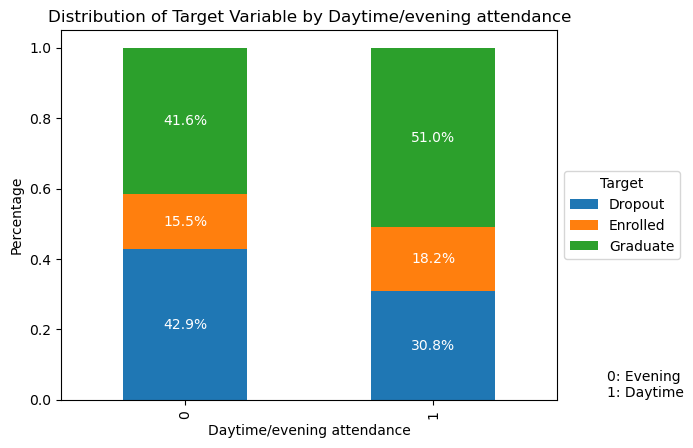

In [148]:
plot_distribution_of_target_by_feature('Daytime/evening attendance')

labels_map = {0: "Evening", 1: "Daytime"}
plot_percentual_distribution_of_target_by_feature('Daytime/evening attendance', labels_map)

Mapping for feature 'Previous qualification':

    0: 'None',
    1: 'Primary',
    2: 'Secondary',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctorate'

    1-  Secondary Education - 12th Year of Schooling or Eq.: 2
    2-  Higher Education - Bachelor's Degree: 3
    3-  Higher Education - Degree: 3
    4-  Higher Education - Master's: 4
    5-  Higher Education - Doctorate: 5
    6-  Frequency of Higher Education: 3
    9-  12th Year of Schooling - Not Completed: 1
    10- 11th Year of Schooling - Not Completed: 1
    12- Other - 11th Year of Schooling: 2
    14- 10th Year of Schooling: 2
    15 - 10th year of schooling - not completed: 1
    19- Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.: 2
    38- Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.: 1
    40- Higher education - degree (1st cycle): 3
    42- Professional higher technical course: 2
    43- Higher Education - Master (2nd cycle): 4

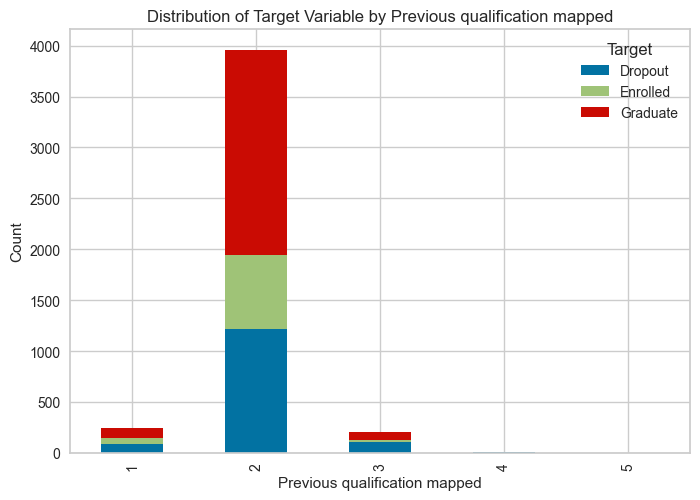

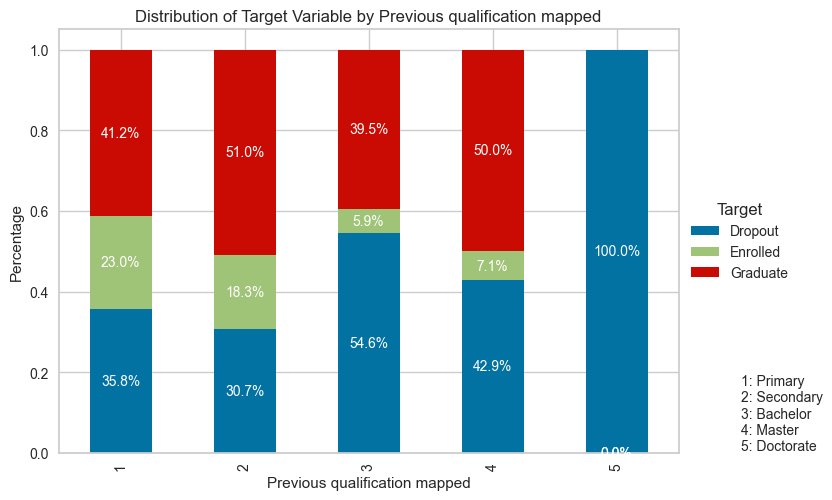

In [69]:
new_mapping = {
    1: 2,
    2: 3,
    3: 3,
    4: 4,
    5: 5,
    6: 3,
    9: 1,
    10: 1,
    12: 2,
    14: 2,
    15: 1,
    19: 2,
    38: 1,
    39: 1,
    40: 3,
    42: 2,
    43: 4,
}
df["Previous qualification mapped"] = df["Previous qualification"].map(new_mapping)
plot_distribution_of_target_by_feature('Previous qualification mapped')

labels_map =   {0: 'None', 1: 'Primary', 2: 'Secondary', 3: 'Bachelor', 4: 'Master', 5: 'Doctorate'}
plot_percentual_distribution_of_target_by_feature('Previous qualification mapped', labels_map)

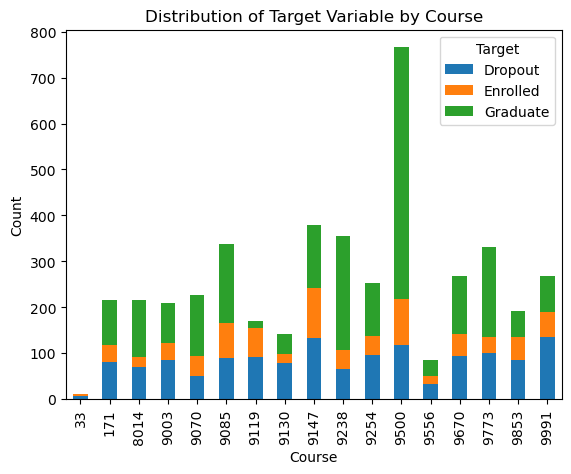

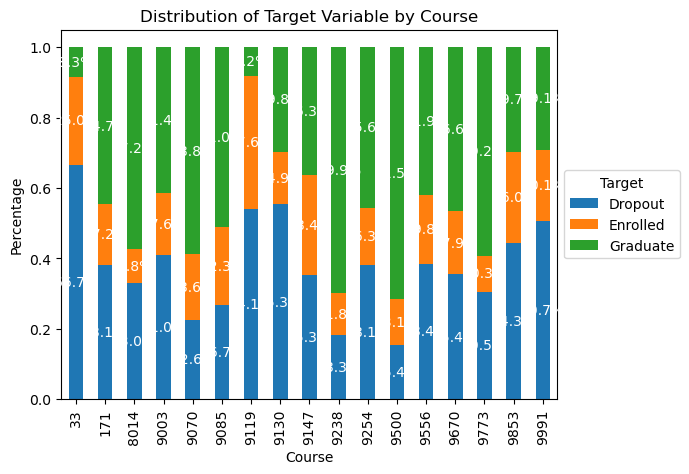

In [192]:
plot_distribution_of_target_by_feature('Course')

labels_map = {33: "Biofuel Production Technologies",
              171: "Animation and Multimedia Design", 
              8014: "Social Service (evening attendance)", 
              9003: "Agronomy", 
              9007: "Communication Design", 
              9085: "Veterinary Nursing",
              9119: "Informatics Engineering",
              9130: "Equinculture",
              9147: "Management",
              9238: "Social Service",
              9254: "Tourism",
              9500: "Nursing",
              9556: "Oral Hygiene",
              9670: "Advertising and Marketing Management",
              9773: "Journalism and Communication",
              9853: "Basic Education",
              9991: "Management (evening attendance)"}
plot_percentual_distribution_of_target_by_feature('Course', labels_map)

In [150]:
import seaborn as sns

def plot_distribution_of_target_by_continuous_feature(feature):
    sns.boxplot(x='Target', y=feature, data=df)
    plt.xlabel('Target Feature')
    plt.ylabel(feature)
    plt.show()

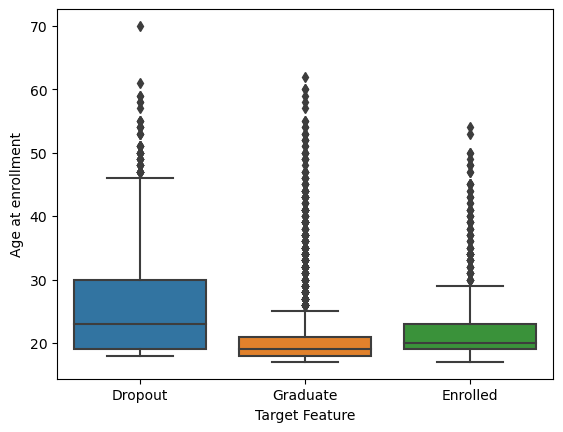

In [78]:
plot_distribution_of_target_by_continuous_feature('Age at enrollment') 

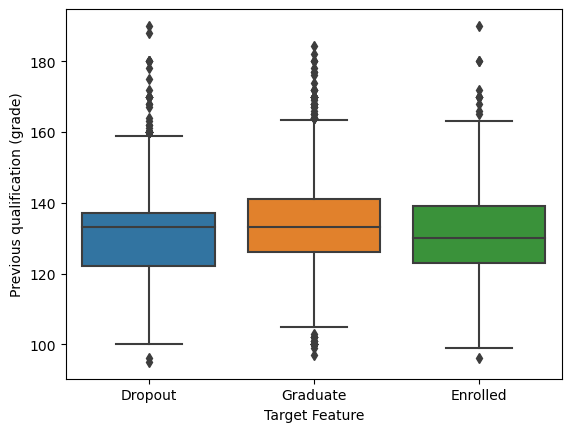

In [73]:
plot_distribution_of_target_by_continuous_feature('Previous qualification (grade)') 

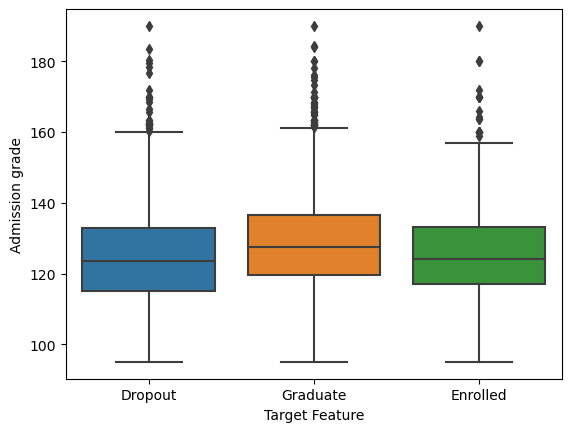

In [68]:
plot_distribution_of_target_by_continuous_feature('Admission grade') 

/var/folders/tn/wjp_97vx7yg_6qh2qztx6z0w0000gn/T/ipykernel_3064/3060942477.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enrollment_features['Target_encoded'] = le.fit_transform(enrollment_features['Target'])
/var/folders/tn/wjp_97vx7yg_6qh2qztx6z0w0000gn/T/ipykernel_3064/3060942477.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = enrollment_features.corr()


<Axes: >

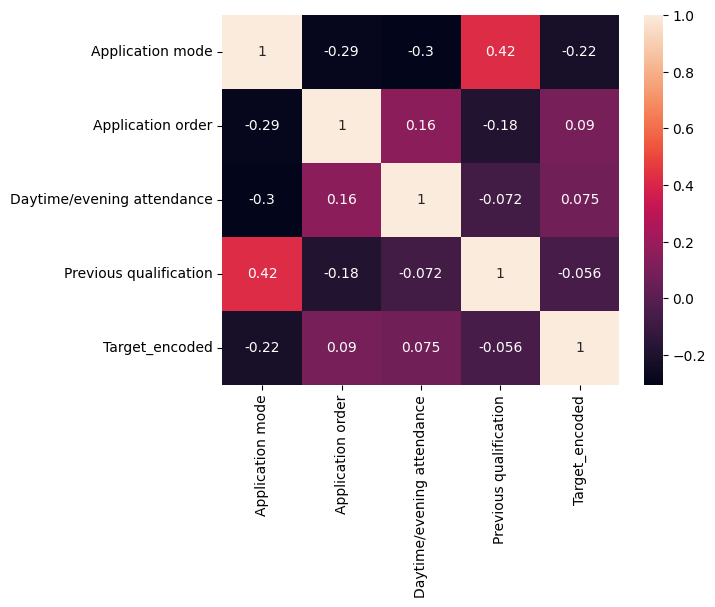

In [25]:
from sklearn.preprocessing import LabelEncoder

# Academic features at enrollment and target
enrollment_features = df[['Application mode', 'Application order', 'Daytime/evening attendance', 'Previous qualification', 'Target']]

le = LabelEncoder()
enrollment_features['Target_encoded'] = le.fit_transform(enrollment_features['Target'])

corr_matrix = enrollment_features.corr()
sns.heatmap(corr_matrix, annot=True)

### Macro-economic data

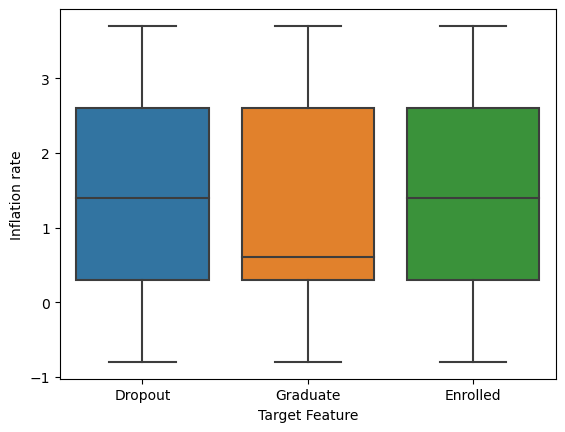

In [65]:
plot_distribution_of_target_by_continuous_feature('Inflation rate')

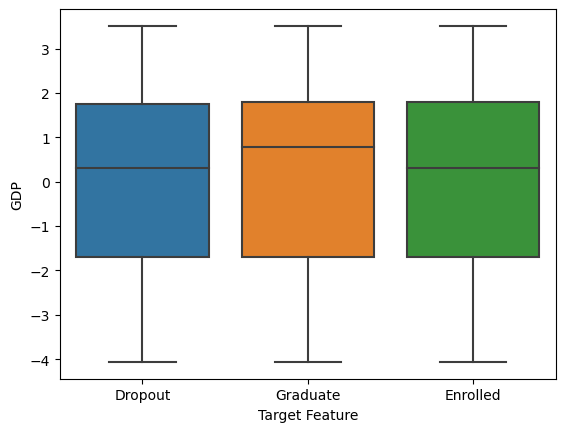

In [66]:
plot_distribution_of_target_by_continuous_feature('GDP')

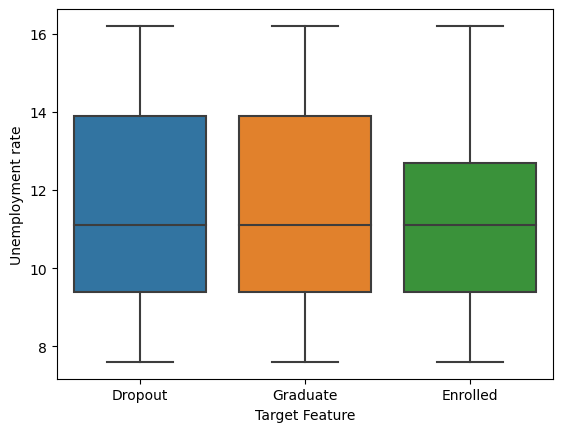

In [67]:
plot_distribution_of_target_by_continuous_feature('Unemployment rate')

/var/folders/tn/wjp_97vx7yg_6qh2qztx6z0w0000gn/T/ipykernel_3064/4178444657.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  macroeconomic_features['Target_encoded'] = le.fit_transform(macroeconomic_features['Target'])
/var/folders/tn/wjp_97vx7yg_6qh2qztx6z0w0000gn/T/ipykernel_3064/4178444657.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = macroeconomic_features.corr()


<Axes: >

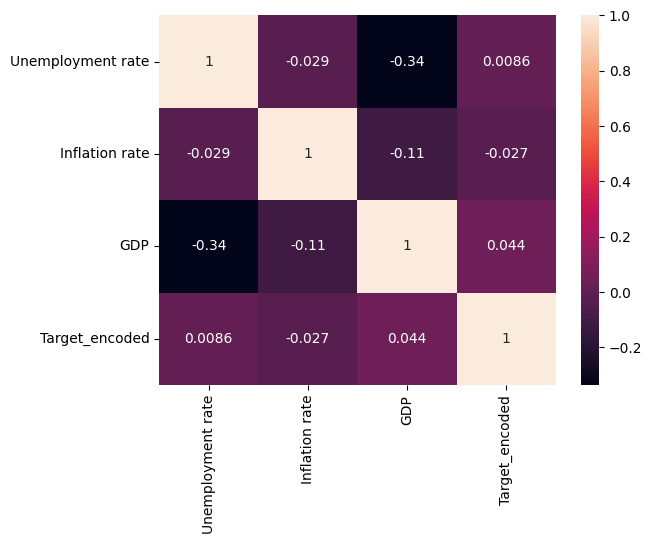

In [26]:
from sklearn.preprocessing import LabelEncoder

# Macro-economic features and target
macroeconomic_features = df[['Unemployment rate', 'Inflation rate', 'GDP', 'Target']]

le = LabelEncoder()
macroeconomic_features['Target_encoded'] = le.fit_transform(macroeconomic_features['Target'])

corr_matrix = macroeconomic_features.corr()
sns.heatmap(corr_matrix, annot=True)

### Academic data at the end of 1st semester

/var/folders/tn/wjp_97vx7yg_6qh2qztx6z0w0000gn/T/ipykernel_3064/868776510.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_sem_features['Target_encoded'] = le.fit_transform(first_sem_features['Target'])
/var/folders/tn/wjp_97vx7yg_6qh2qztx6z0w0000gn/T/ipykernel_3064/868776510.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = first_sem_features.corr()


<Axes: >

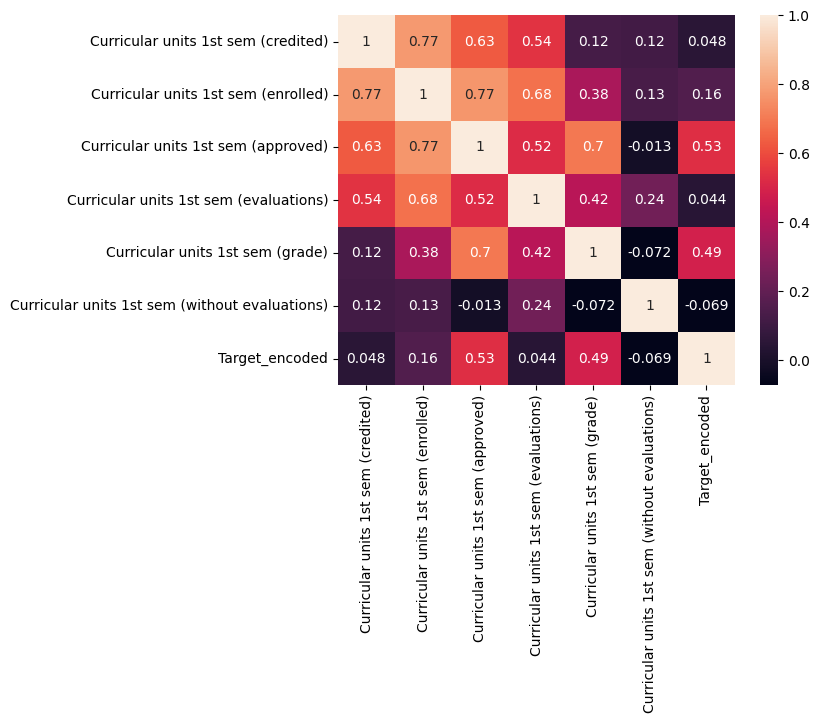

In [27]:
from sklearn.preprocessing import LabelEncoder

# Macro-economic features and target
first_sem_features = df[['Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 
                       'Curricular units 1st sem (approved)',  'Curricular units 1st sem (evaluations)',
                       'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
                       'Target']]

le = LabelEncoder()
first_sem_features['Target_encoded'] = le.fit_transform(first_sem_features['Target'])

corr_matrix = first_sem_features.corr()
sns.heatmap(corr_matrix, annot=True)

### Academic data at the end of 2nd semester

/var/folders/tn/wjp_97vx7yg_6qh2qztx6z0w0000gn/T/ipykernel_3064/3544447867.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_sem_features['Target_encoded'] = le.fit_transform(second_sem_features['Target'])
/var/folders/tn/wjp_97vx7yg_6qh2qztx6z0w0000gn/T/ipykernel_3064/3544447867.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = second_sem_features.corr()


<Axes: >

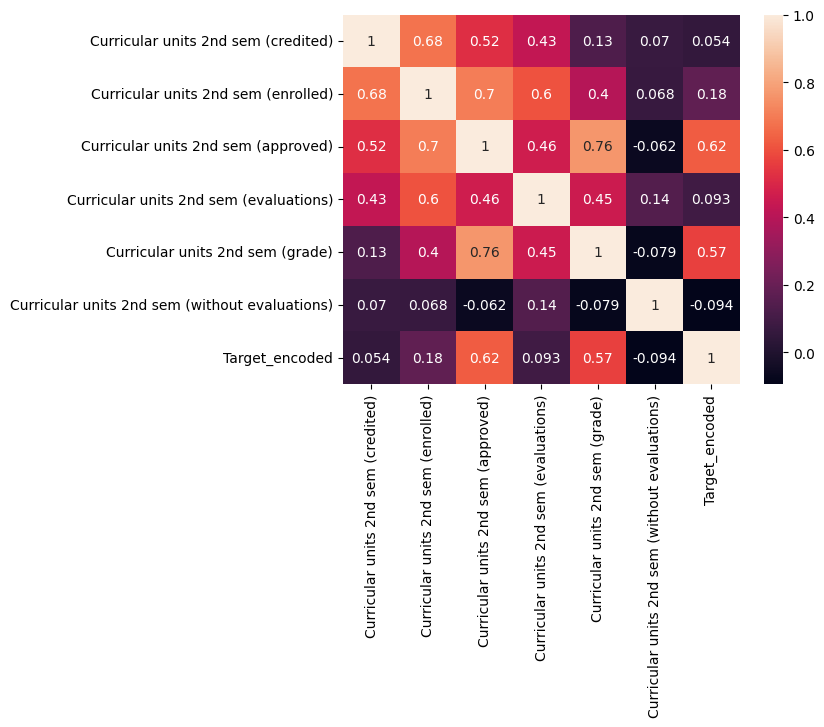

In [28]:
from sklearn.preprocessing import LabelEncoder

# Macro-economic features and target
second_sem_features = df[['Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 
                       'Curricular units 2nd sem (approved)',  'Curricular units 2nd sem (evaluations)',
                       'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)',
                       'Target']]

le = LabelEncoder()
second_sem_features['Target_encoded'] = le.fit_transform(second_sem_features['Target'])

corr_matrix = second_sem_features.corr()
sns.heatmap(corr_matrix, annot=True)

### Feature Ranking

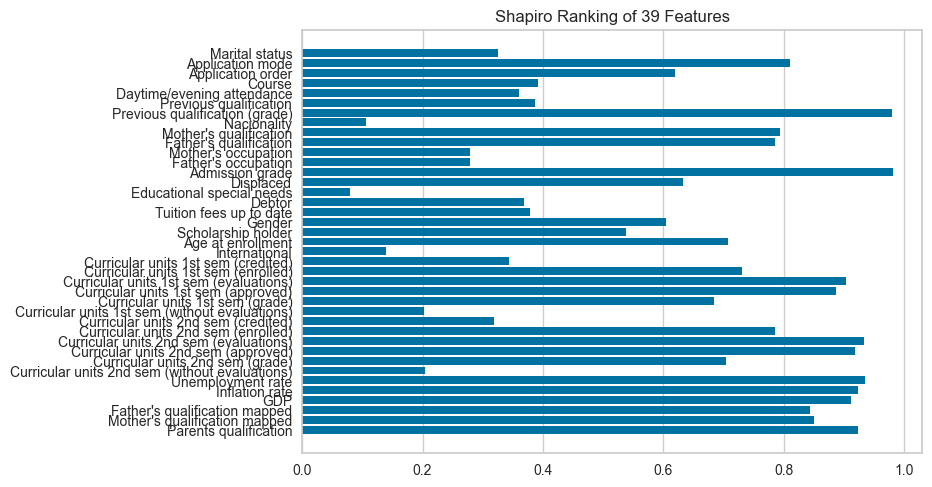

['Tuition fees up to date', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Previous qualification', 'Previous qualification (grade)', 'Application mode', 'Application order', 'Course']


In [29]:
from yellowbrick.features import Rank1D

feature_names = df.columns.tolist()
feature_names.remove('Target')

target_name = 'Target'

X = df[feature_names]
Y = df[target_name]

# Instantiate the 1D visualizer with the Sharpiro ranking algorithm
visualizer = Rank1D(features=feature_names, algorithm='shapiro')

visualizer.fit(X, Y)
visualizer.transform(X)
visualizer.poof()

# Get the top 10 most important features
feature_importances = visualizer.features_
top_features = sorted(feature_importances, key=lambda x: x[1], reverse=True)[:18]
print(top_features)

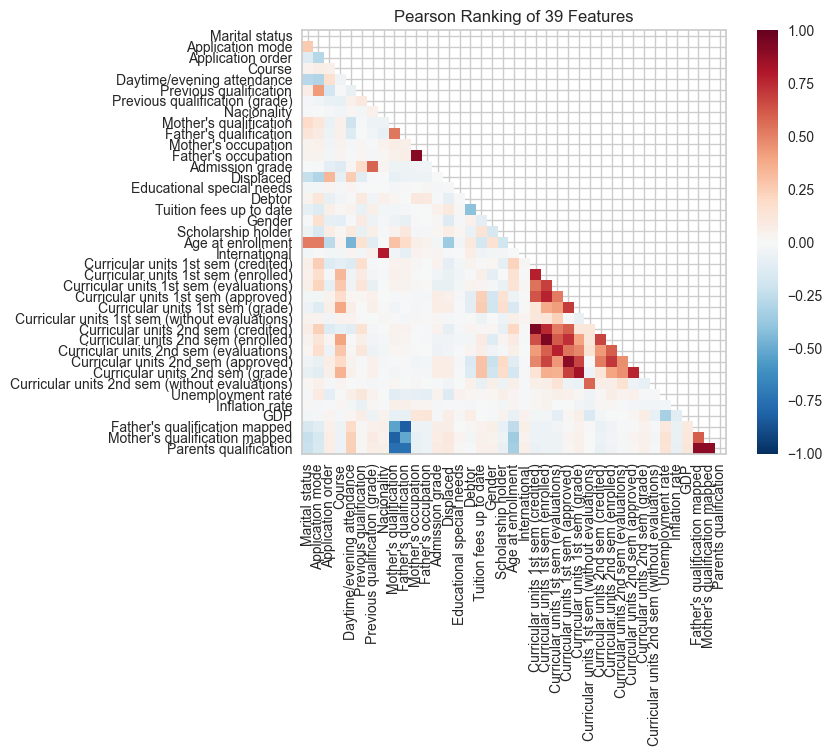

<Axes: title={'center': 'Pearson Ranking of 39 Features'}>

In [30]:
from yellowbrick.features import Rank2D 

# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(features=feature_names, algorithm='pearson')

visualizer.fit(X, Y)                
visualizer.transform(X)    
visualizer.poof()

In [31]:
corr_matrix = df.corr()
collinear_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.55:
            colname_i = corr_matrix.columns[i]
            colname_j = corr_matrix.columns[j]
            collinear_features.add(colname_i)
            collinear_features.add(colname_j)

# Print the collinear feature pairs
print("Collinear feature pairs:")
print(collinear_features)
print(len(collinear_features))

Collinear feature pairs:
{"Father's qualification", "Mother's qualification mapped", 'Parents qualification', 'Curricular units 1st sem (grade)', 'International', "Mother's occupation", "Father's occupation", 'Curricular units 2nd sem (approved)', 'Admission grade', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (without evaluations)', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 2nd sem (enrolled)', "Mother's qualification", 'Curricular units 1st sem (without evaluations)', 'Nacionality', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (evaluations)', 'Previous qualification (grade)', "Father's qualification mapped", 'Curricular units 2nd sem (grade)'}
23


/var/folders/tn/wjp_97vx7yg_6qh2qztx6z0w0000gn/T/ipykernel_3064/3504316169.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


### Feature selection

In [67]:
best_ranked_features = [
    'Curricular units 2nd sem (grade)', 
    'Curricular units 1st sem (grade)', 
    'Curricular units 2nd sem (credited)', 
    'Curricular units 1st sem (credited)', 
    'Curricular units 2nd sem (approved)', 
    'Curricular units 1st sem (approved)', 
    'Curricular units 2nd sem (without evaluations)', 
    'Curricular units 1st sem (without evaluations)', 
    'Curricular units 1st sem (evaluations)', 
    'Curricular units 2nd sem (evaluations)', 
    'Curricular units 2nd sem (enrolled)', 
    'Curricular units 1st sem (enrolled)',
    'Admission grade', 
    'Application mode', 
    'Application order', 
    'Course',
    'Previous qualification (grade)', 
    'Tuition fees up to date'
]

selected_features = [
    'Displaced',
    'Gender',
    'Age at enrollment',
    'Tuition fees up to date',
    'Scholarship holder',
    'Debtor',
    'Application mode',
    'Course',
    'Daytime/evening attendance',
    'Previous qualification mapped',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)'
]

### Clustering

In [33]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def elbow_method(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    sum_of_squared_distances = []
    k_range = range(1,10)
    for k in k_range:
        km = KMeans(n_clusters=k)
        km = km.fit(X_scaled)
        sum_of_squared_distances.append(km.inertia_)

    plt.plot(k_range, sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum of squared distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()   

In [34]:
from sklearn.cluster import KMeans

def cluster_data(k, X):    
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    return kmeans

In [35]:
def print_and_plot_size_and_distribution_of_each_cluster(k, labels):
    # print the size and distribution of each cluster
    for i in range(k):
        cluster_size = sum(labels == i)
        print(f"Cluster {i+1} size: {cluster_size}")
        print(f"Cluster {i+1} distribution: {cluster_size / len(labels) * 100:.2f}%")
        
    # add cluster labels to the original dataset
    X_clustered = pd.concat([pd.DataFrame(X), pd.Series(kmeans.labels_, name='cluster')], axis=1)

    # plot histogram of cluster sizes
    plt.hist(X_clustered['cluster'])
    plt.xlabel('Cluster')
    plt.ylabel('Number of samples')
    plt.show()
    
def calculate_mean_of_each_feature_per_cluster(labels):
   # add new column in data frame
    cluster_df = pd.DataFrame({'Cluster': labels})
    df_clustered = pd.concat([df, cluster_df], axis=1)
    cluster_features = df_clustered.groupby('Cluster').mean()

    # apply different styles to the table
    styled_table = cluster_features.style\
        .background_gradient(cmap='viridis', low=0.2, high=0.2)\
        .highlight_max(axis=0)\
        .set_caption('Cluster Features')
    
    display(styled_table) 

In [36]:
def analyze_mean_and_standard_deviation_within_each_cluster(k, labels):
    for i in range(k):
        print("Cluster ", i)
        print("Mean: \n", np.mean(X[labels == i], axis=0))
        print("Std: \n", np.std(X[labels == i], axis=0))
        print("\n\n")

In [45]:
def plot_distribution_of_each_feature_per_cluster(X, labels, centroids, rows=6):
    # create subplots for each feature
    fig, axs = plt.subplots(nrows=rows, ncols=3, figsize=(15, 25))

    # loop through each feature and plot its distribution for each cluster
    for i, feature in enumerate(X):
        row = i // 3
        col = i % 3
        ax = axs[row][col]
        for label in set(labels):
            ax.hist(df.loc[labels==label, feature], alpha=0.5, label=f'Cluster {label}')
        ax.axvline(x=centroids[0, i], linestyle='--', color='k', label='Centroid 0')
        ax.axvline(x=centroids[1, i], linestyle='--', color='r', label='Centroid 1')
        ax.axvline(x=centroids[2, i], linestyle='--', color='g', label='Centroid 2')
        ax.set_title(f'{feature} Distribution by Cluster')
        ax.legend()

    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:8

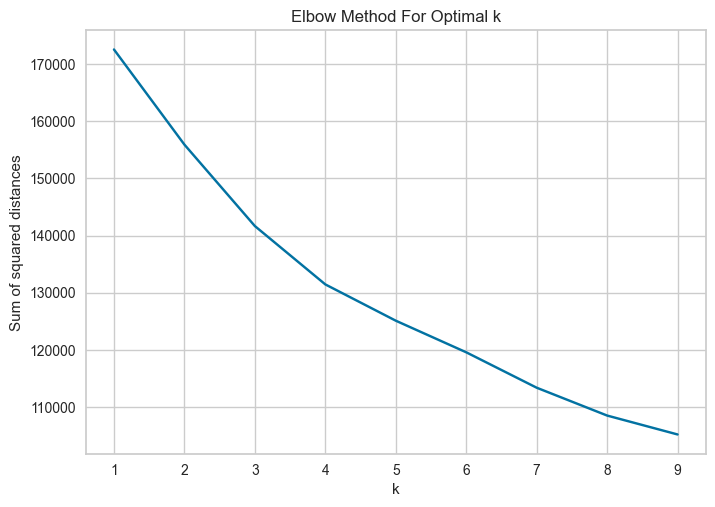

In [59]:
# Clustering on whole dataset (except 'Target')

X = df.drop('Target', axis=1)
elbow_method(X)

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1 size: 1911
Cluster 1 distribution: 43.20%
Cluster 2 size: 227
Cluster 2 distribution: 5.13%
Cluster 3 size: 2286
Cluster 3 distribution: 51.67%


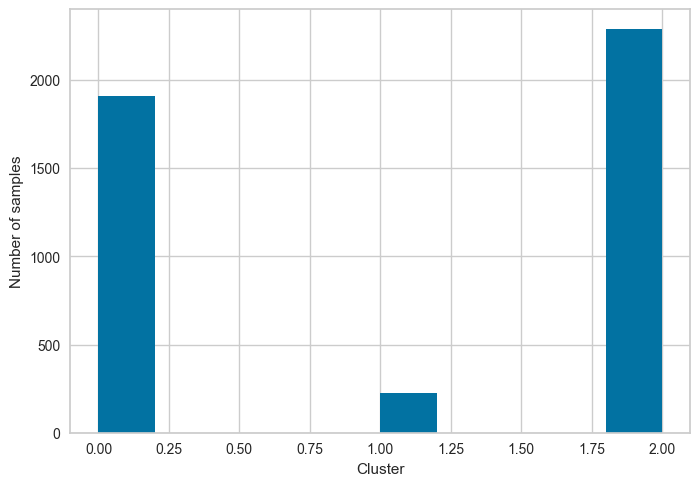

/var/folders/tn/wjp_97vx7yg_6qh2qztx6z0w0000gn/T/ipykernel_3064/3910536400.py:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_features = df_clustered.groupby('Cluster').mean()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Father's qualification mapped,Mother's qualification mapped,Parents qualification
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.194139,16.987964,1.981162,9677.971219,0.859759,2.800105,132.561015,1.856620,20.138671,22.568289,10.335426,10.290424,126.385557,0.569859,0.011512,0.087912,0.900576,0.287807,0.282051,22.969649,0.022501,0.406070,6.696494,8.200419,5.198849,11.505157,0.104657,0.340659,6.845631,8.115123,5.146520,11.156566,0.147567,11.563318,1.293982,-0.121062,1.302983,1.473574,2.776557
1,1.017621,11.568282,1.511013,163.704846,1.000000,3.008811,137.393833,2.960352,15.471366,18.638767,6.801762,7.158590,135.225991,0.779736,0.022026,0.149780,0.859031,0.555066,0.229075,20.775330,0.044053,1.458150,2.603524,2.938326,2.229075,2.469956,0.000000,1.140969,2.396476,3.048458,1.920705,2.448296,0.039648,11.455947,1.151982,0.172115,1.594714,1.823789,3.418502
2,1.181540,20.779528,1.537620,9033.255906,0.905949,6.219598,132.182327,1.779090,19.486002,22.391514,11.896763,12.037183,126.654462,0.507437,0.010499,0.131671,0.866142,0.384952,0.222222,23.759405,0.024934,0.889764,6.278653,8.913823,4.541120,10.729641,0.178915,0.650481,6.100175,8.517935,4.091426,10.228552,0.163605,11.579440,1.180446,0.087922,1.339895,1.503500,2.843395


In [47]:
chosen_k = 3
kmeans = cluster_data(chosen_k, X)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_
print_and_plot_size_and_distribution_of_each_cluster(chosen_k, labels)
calculate_mean_of_each_feature_per_cluster(labels)

In [146]:
#analyze_mean_and_standard_deviation_within_each_cluster(chosen_k, labels)
#plot_distribution_of_each_feature_per_cluster(X, labels, 36)

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:8

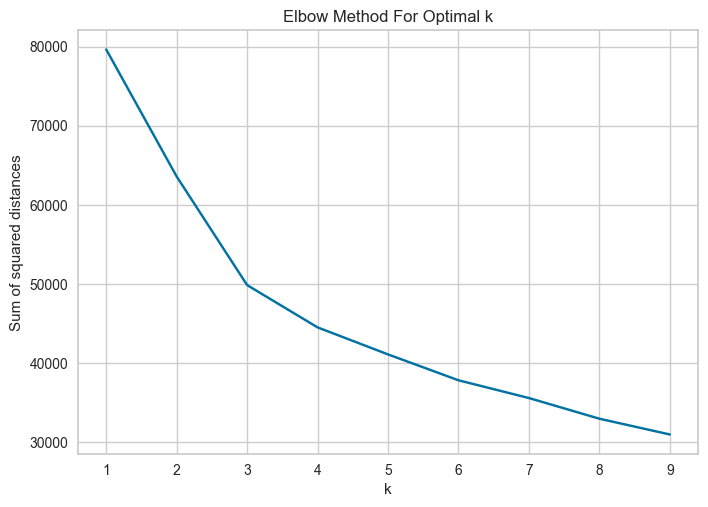

In [60]:
# Clustering on best ranked features
if 'Target' in best_ranked_features:
    best_ranked_features.remove('Target')
X = df[best_ranked_features]
elbow_method(X)

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1 size: 1911
Cluster 1 distribution: 43.20%
Cluster 2 size: 227
Cluster 2 distribution: 5.13%
Cluster 3 size: 2286
Cluster 3 distribution: 51.67%


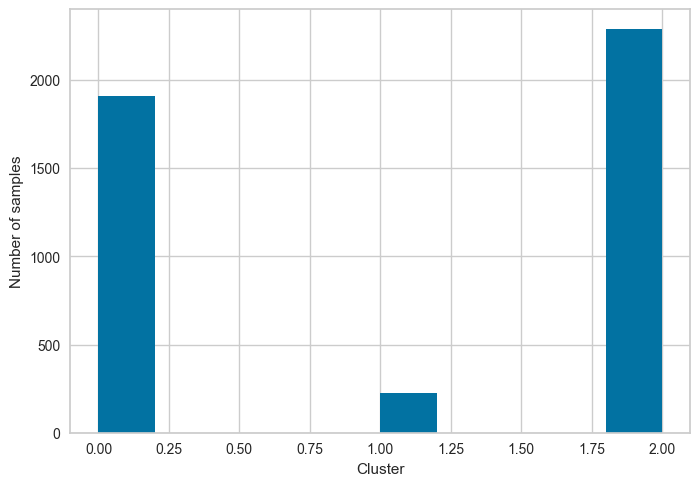

/var/folders/tn/wjp_97vx7yg_6qh2qztx6z0w0000gn/T/ipykernel_3064/3910536400.py:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_features = df_clustered.groupby('Cluster').mean()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Father's qualification mapped,Mother's qualification mapped,Parents qualification
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.194139,16.987964,1.981162,9677.971219,0.859759,2.800105,132.561015,1.856620,20.138671,22.568289,10.335426,10.290424,126.385557,0.569859,0.011512,0.087912,0.900576,0.287807,0.282051,22.969649,0.022501,0.406070,6.696494,8.200419,5.198849,11.505157,0.104657,0.340659,6.845631,8.115123,5.146520,11.156566,0.147567,11.563318,1.293982,-0.121062,1.302983,1.473574,2.776557
1,1.017621,11.568282,1.511013,163.704846,1.000000,3.008811,137.393833,2.960352,15.471366,18.638767,6.801762,7.158590,135.225991,0.779736,0.022026,0.149780,0.859031,0.555066,0.229075,20.775330,0.044053,1.458150,2.603524,2.938326,2.229075,2.469956,0.000000,1.140969,2.396476,3.048458,1.920705,2.448296,0.039648,11.455947,1.151982,0.172115,1.594714,1.823789,3.418502
2,1.181540,20.779528,1.537620,9033.255906,0.905949,6.219598,132.182327,1.779090,19.486002,22.391514,11.896763,12.037183,126.654462,0.507437,0.010499,0.131671,0.866142,0.384952,0.222222,23.759405,0.024934,0.889764,6.278653,8.913823,4.541120,10.729641,0.178915,0.650481,6.100175,8.517935,4.091426,10.228552,0.163605,11.579440,1.180446,0.087922,1.339895,1.503500,2.843395


In [61]:
chosen_k = 3
kmeans = cluster_data(chosen_k, X)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_
print_and_plot_size_and_distribution_of_each_cluster(chosen_k, labels)
calculate_mean_of_each_feature_per_cluster(labels)

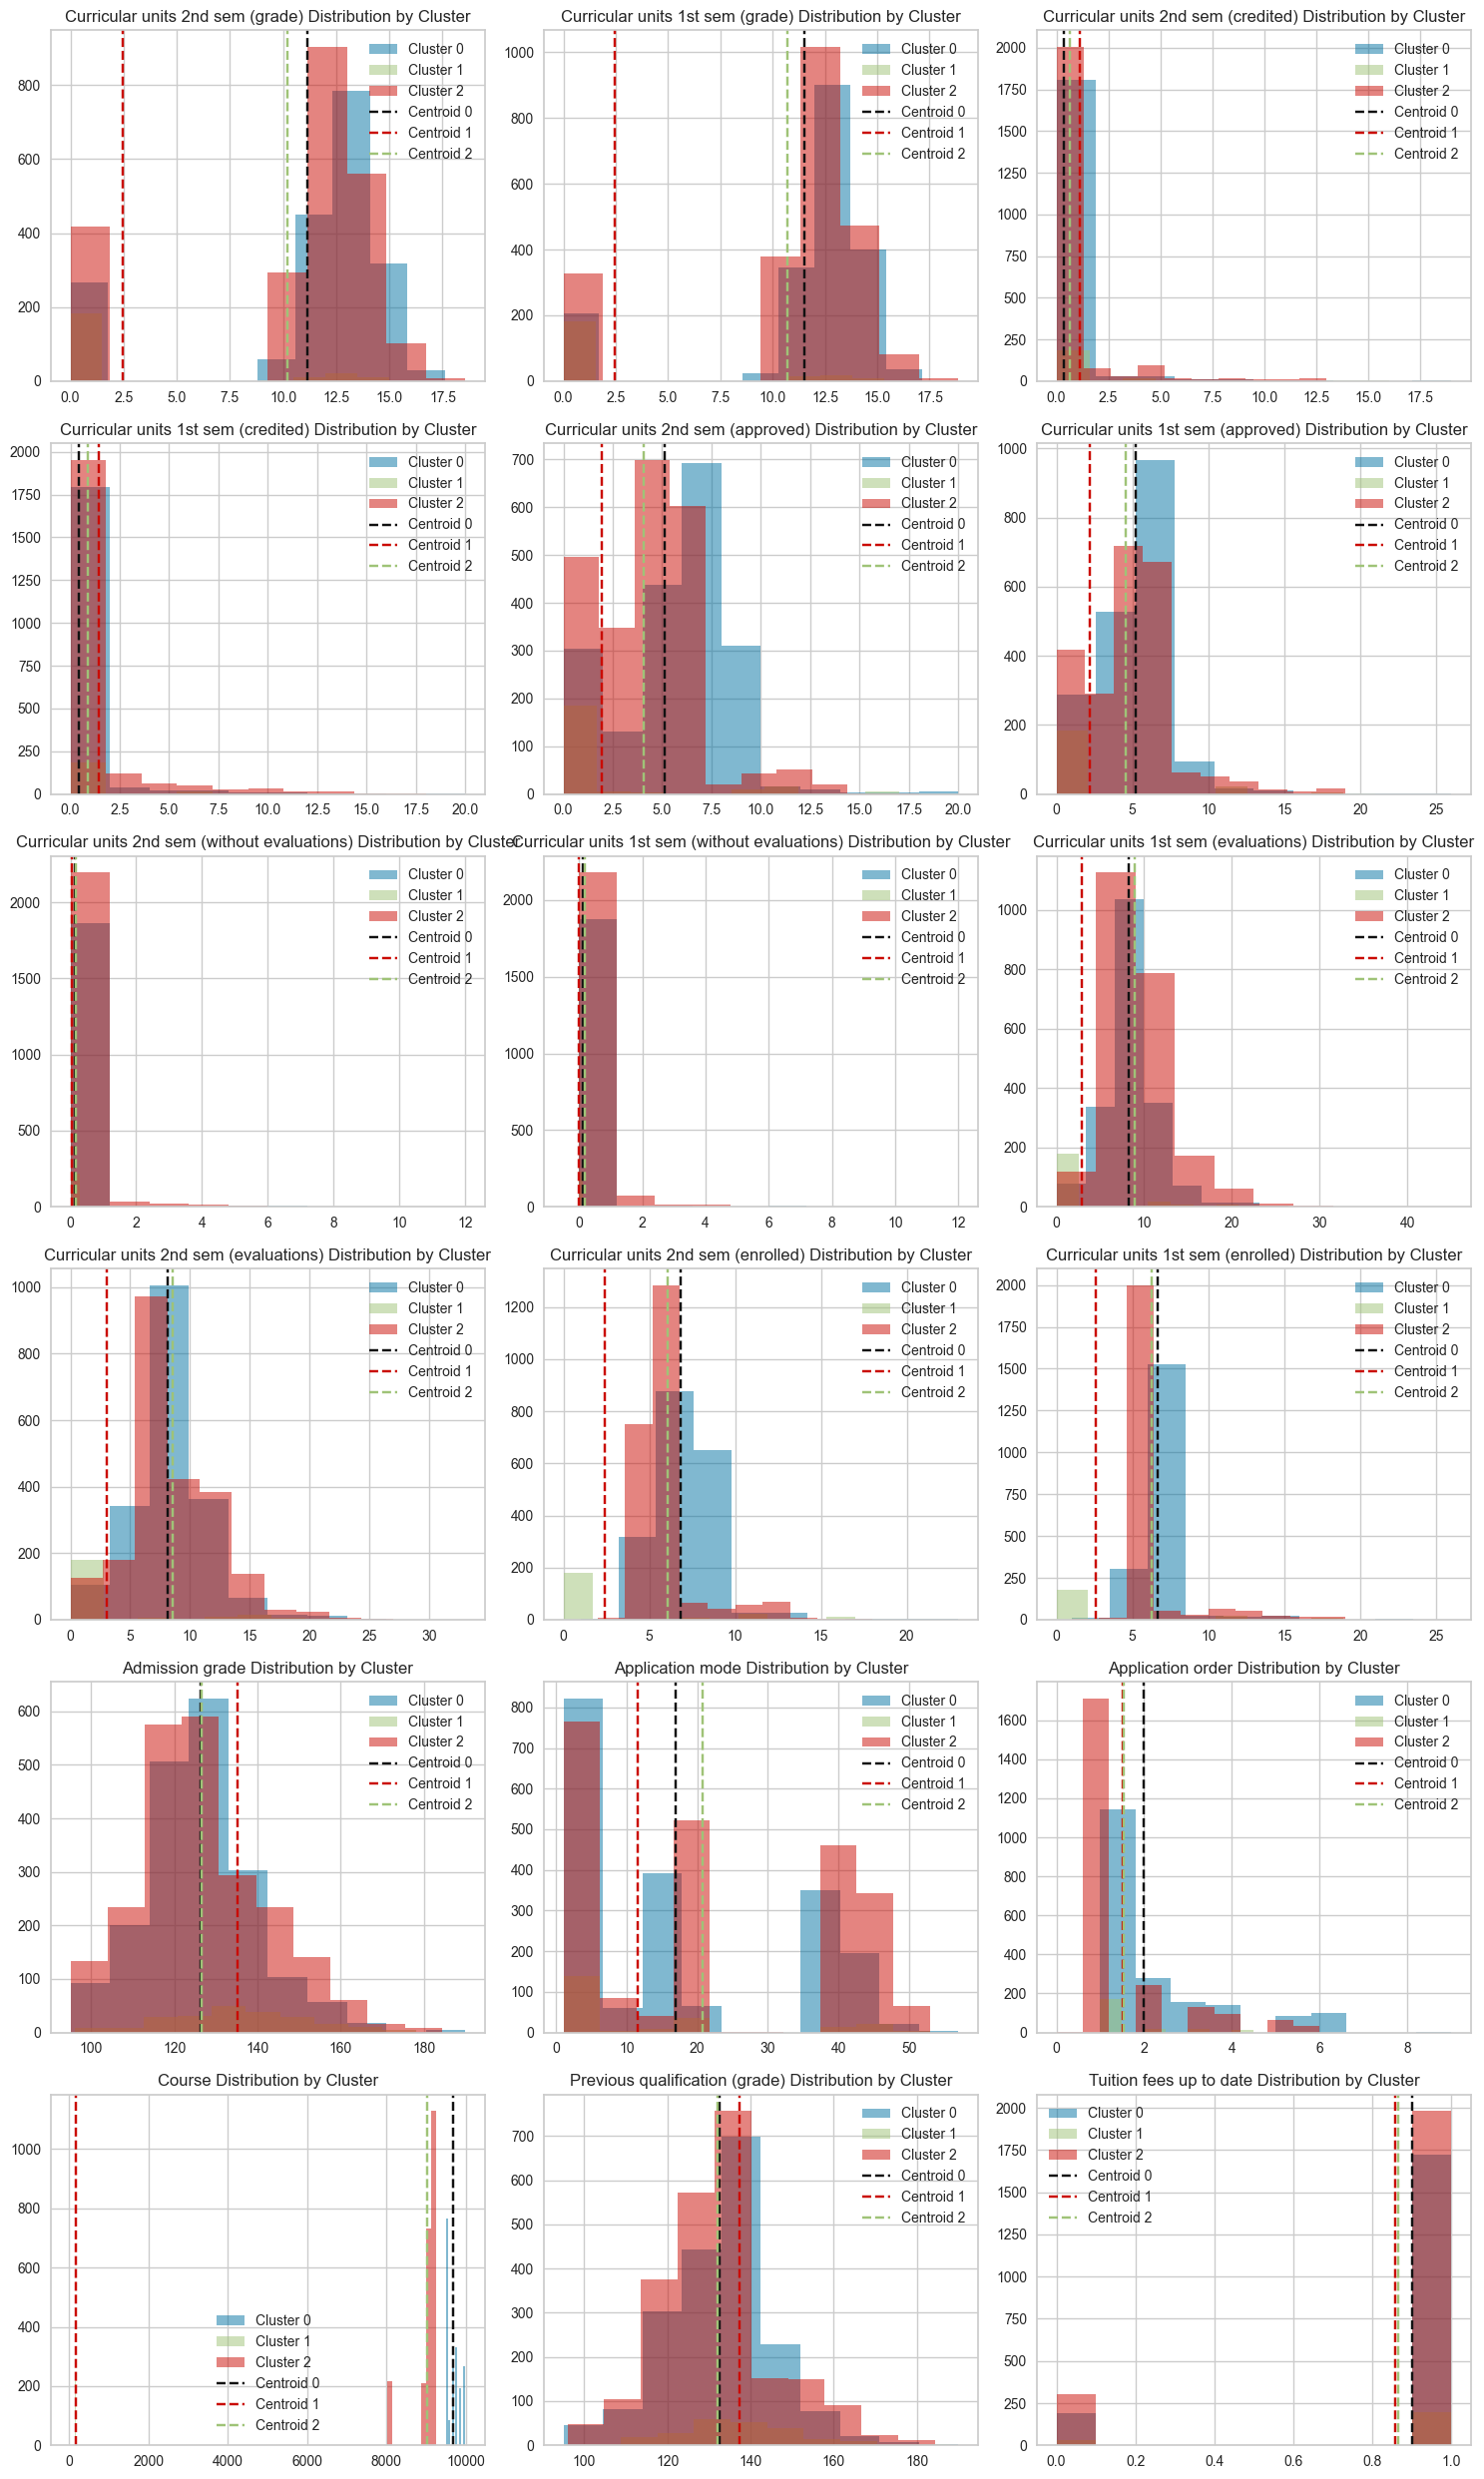

In [62]:
#analyze_mean_and_standard_deviation_within_each_cluster(chosen_k, labels)
plot_distribution_of_each_feature_per_cluster(X, labels, centroids)

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:8

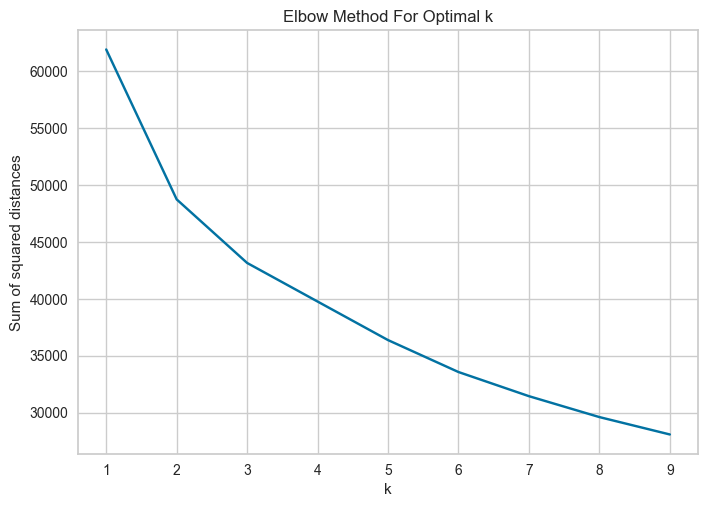

In [70]:
# Clustering on selected features

if 'Target' in selected_features:
    selected_features.remove('Target')
X = df[selected_features]
elbow_method(X)

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1 size: 1911
Cluster 1 distribution: 43.20%
Cluster 2 size: 227
Cluster 2 distribution: 5.13%
Cluster 3 size: 2286
Cluster 3 distribution: 51.67%


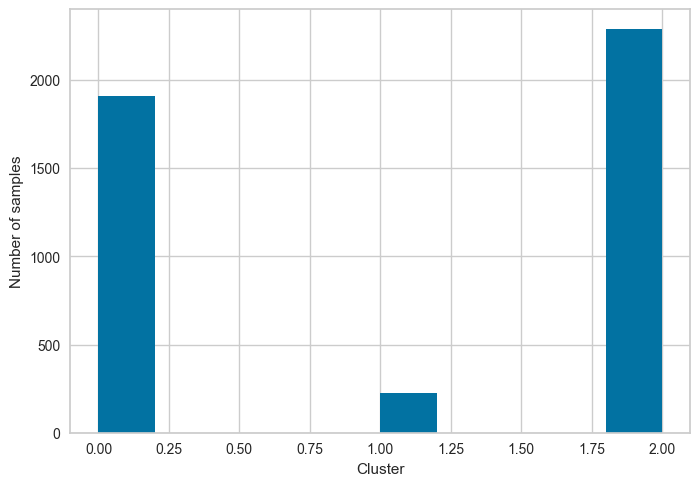

/var/folders/tn/wjp_97vx7yg_6qh2qztx6z0w0000gn/T/ipykernel_3064/3910536400.py:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_features = df_clustered.groupby('Cluster').mean()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Father's qualification mapped,Mother's qualification mapped,Parents qualification,Previous qualification mapped
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.194139,16.987964,1.981162,9677.971219,0.859759,2.800105,132.561015,1.856620,20.138671,22.568289,10.335426,10.290424,126.385557,0.569859,0.011512,0.087912,0.900576,0.287807,0.282051,22.969649,0.022501,0.406070,6.696494,8.200419,5.198849,11.505157,0.104657,0.340659,6.845631,8.115123,5.146520,11.156566,0.147567,11.563318,1.293982,-0.121062,1.302983,1.473574,2.776557,2.041863
1,1.017621,11.568282,1.511013,163.704846,1.000000,3.008811,137.393833,2.960352,15.471366,18.638767,6.801762,7.158590,135.225991,0.779736,0.022026,0.149780,0.859031,0.555066,0.229075,20.775330,0.044053,1.458150,2.603524,2.938326,2.229075,2.469956,0.000000,1.140969,2.396476,3.048458,1.920705,2.448296,0.039648,11.455947,1.151982,0.172115,1.594714,1.823789,3.418502,1.986784
2,1.181540,20.779528,1.537620,9033.255906,0.905949,6.219598,132.182327,1.779090,19.486002,22.391514,11.896763,12.037183,126.654462,0.507437,0.010499,0.131671,0.866142,0.384952,0.222222,23.759405,0.024934,0.889764,6.278653,8.913823,4.541120,10.729641,0.178915,0.650481,6.100175,8.517935,4.091426,10.228552,0.163605,11.579440,1.180446,0.087922,1.339895,1.503500,2.843395,1.963255


In [73]:
chosen_k = 3
kmeans = cluster_data(chosen_k, X)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_
print_and_plot_size_and_distribution_of_each_cluster(chosen_k, labels)
calculate_mean_of_each_feature_per_cluster(labels)

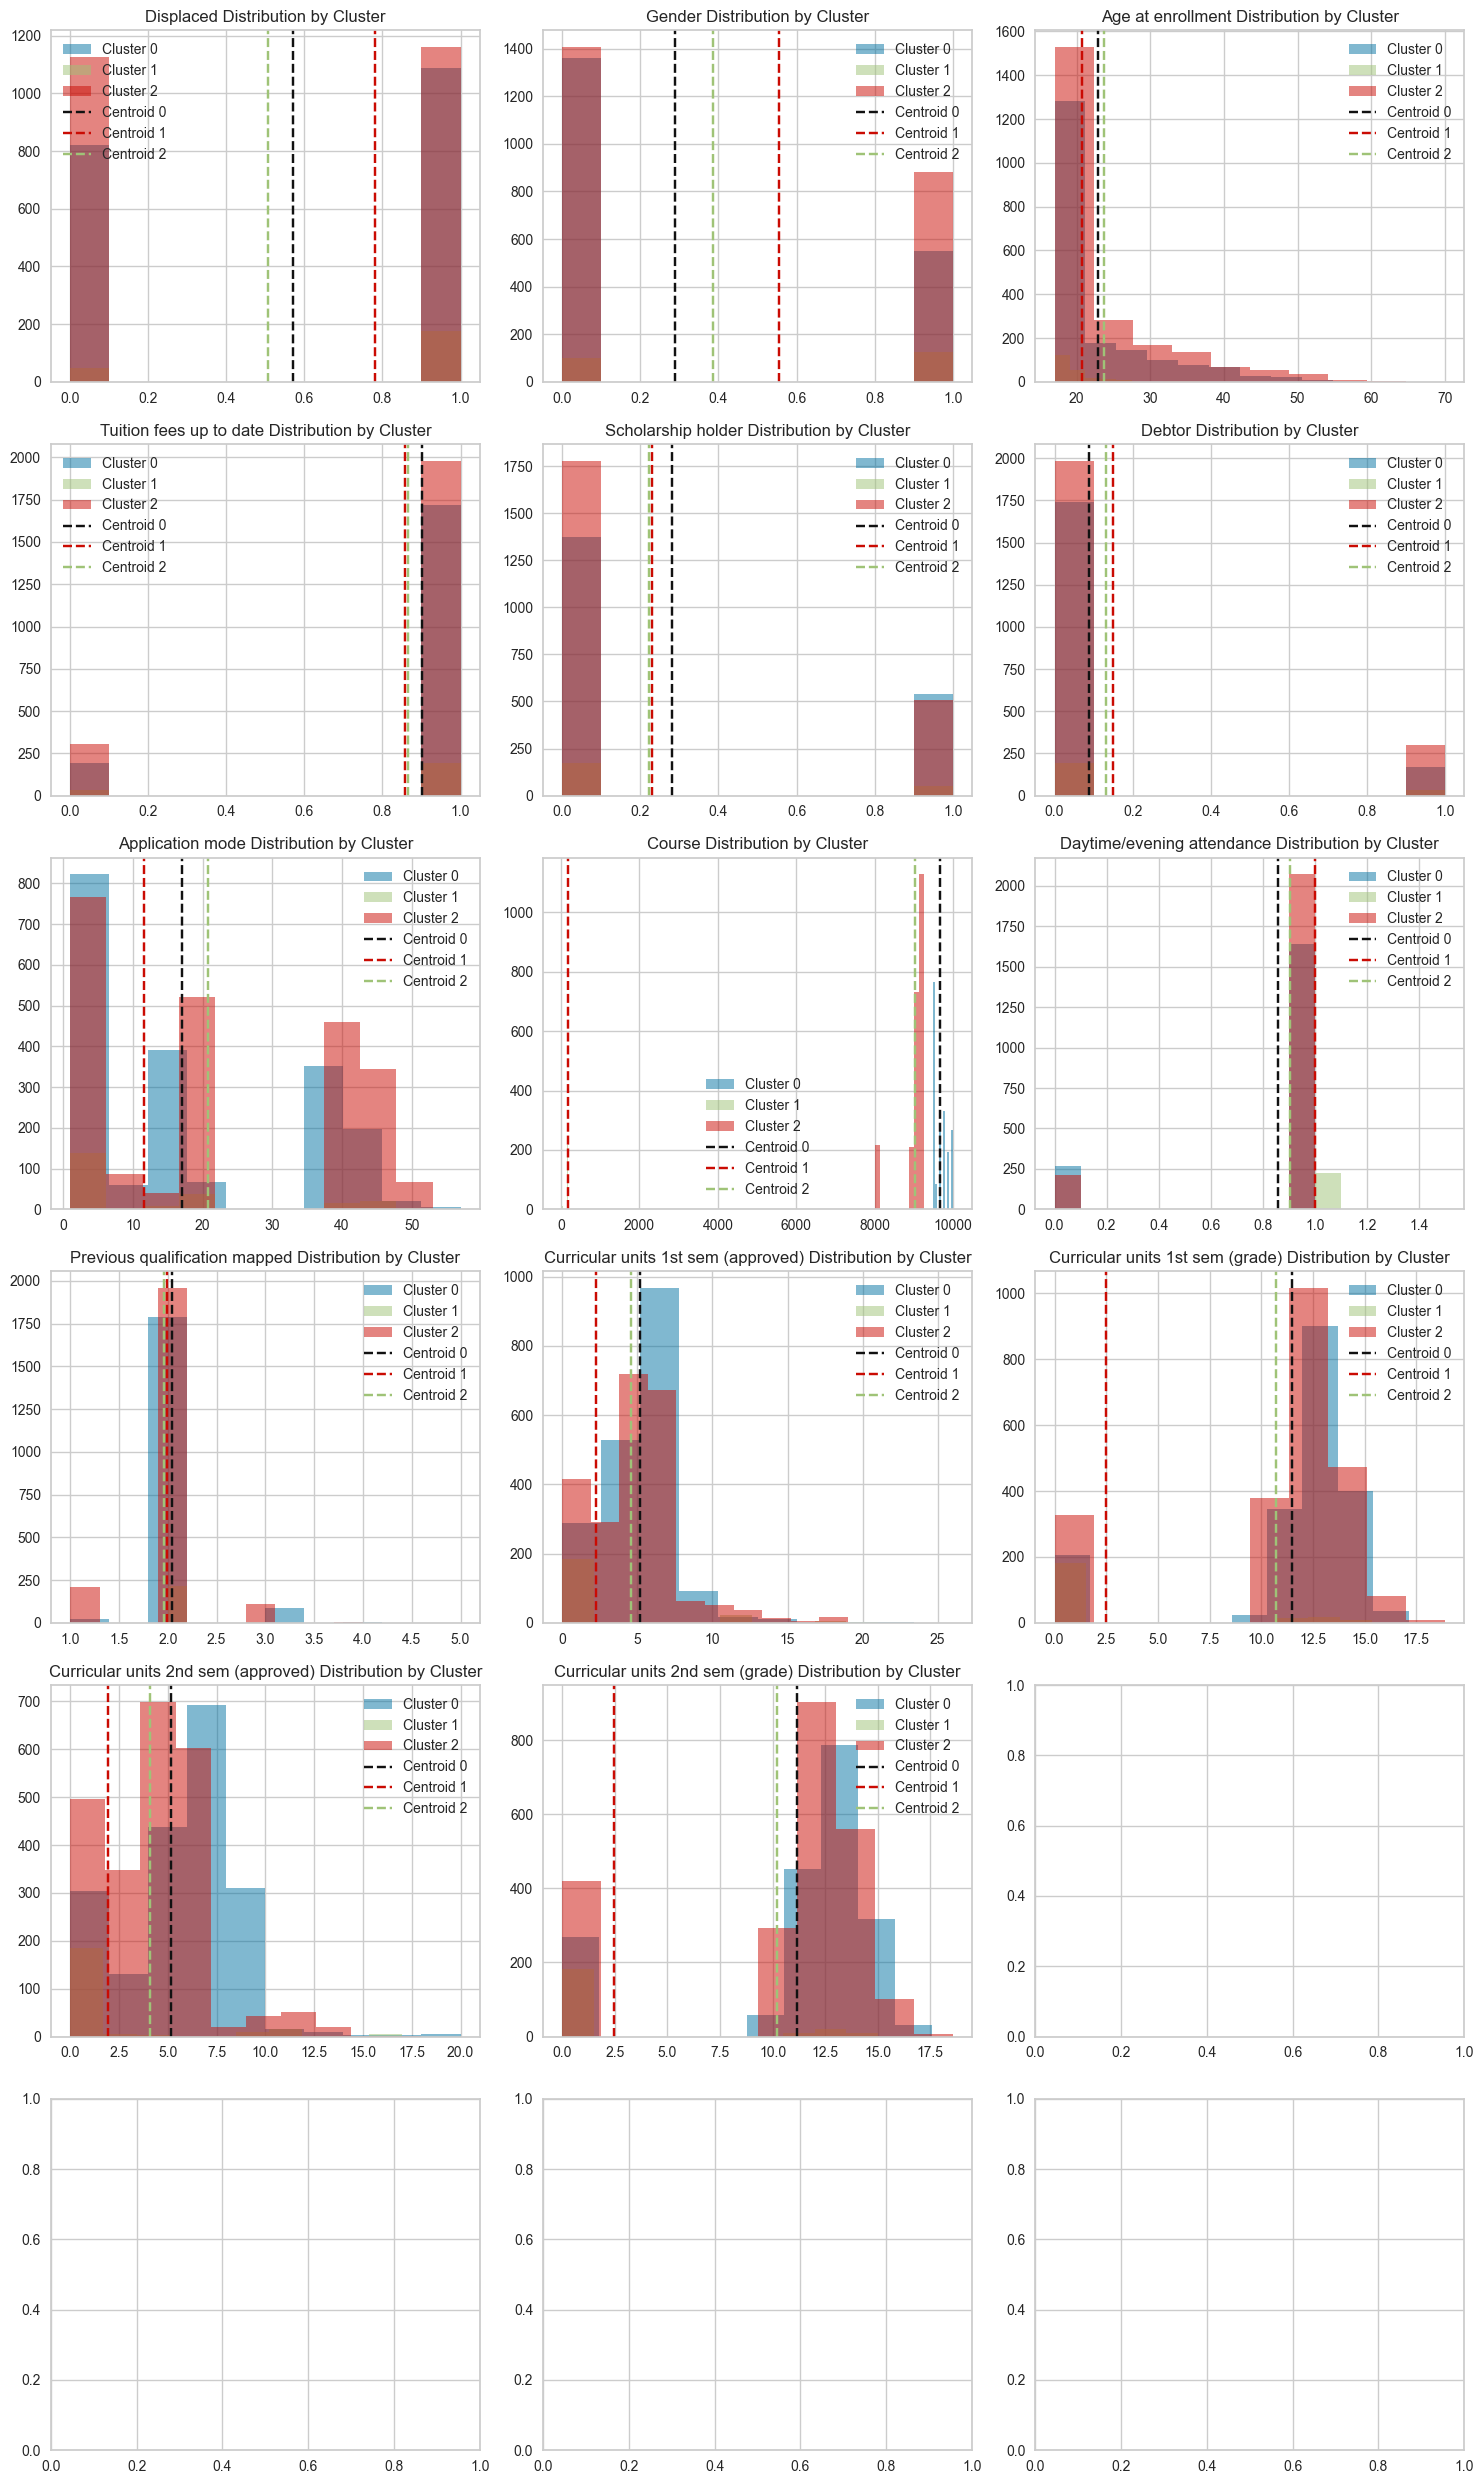

In [74]:
#analyze_mean_and_standard_deviation_within_each_cluster(chosen_k, labels)
plot_distribution_of_each_feature_per_cluster(X, labels, centroids)